In [1]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch
from utils import calc_embeddings

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'cmc'
test_on_all_folds = True
test_all_ds = True

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy3(datasets)

In [6]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 16},
  'weighted_triplet_loss': True,
  'lr': 0.0015,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 150}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.0015,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 300}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 10},
 'weighted_triplet_loss': True,
 'lr': 0.004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 200}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [7]:
from experiment import dt_name_to_cols_to_encode

In [8]:
for dataset_name in dt_name_to_cols_to_encode:
    data, target = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    config[f"{dataset_name}"]['nn_config']['units_decision_layer'] = np.unique(target).size
    config[f"{dataset_name}_encoded"]['nn_config']['units_decision_layer'] = np.unique(target).size

In [9]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8,
   'units_decision_layer': 3},
  'weighted_tri

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = defaultdict(int)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
#         print(x)
#         print(y[i])
#         print(nbors[1:])
#         print(y[nbors[1:]])
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [11]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

cmc


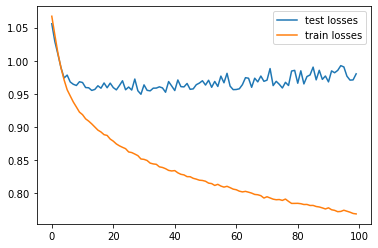

100%|██████████| 1178/1178 [00:00<00:00, 3516.27it/s]


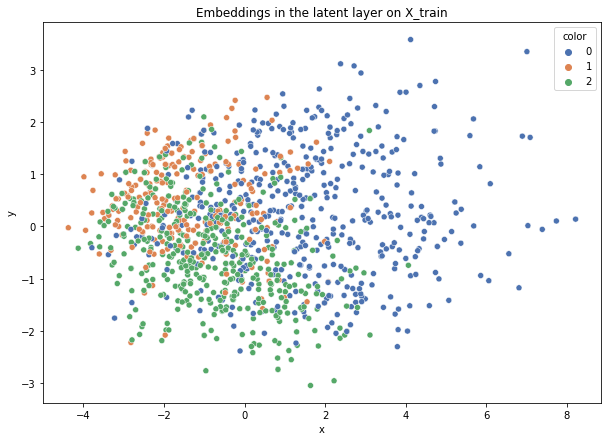

Softmax-f1: 0.508
Softmax-gmean: 0.5


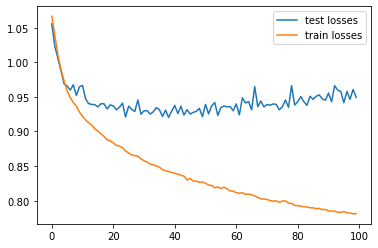

100%|██████████| 1178/1178 [00:00<00:00, 3441.27it/s]


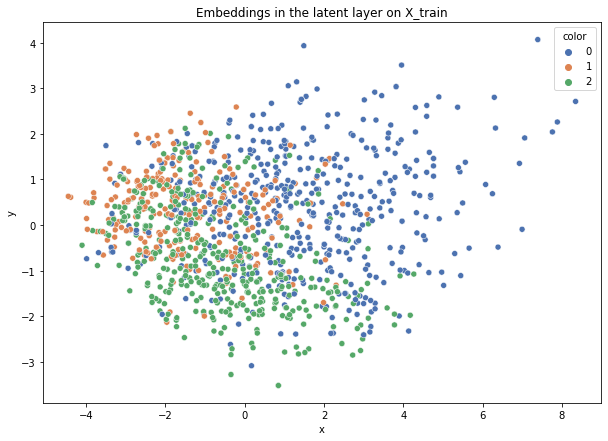

Softmax-f1: 0.528
Softmax-gmean: 0.515


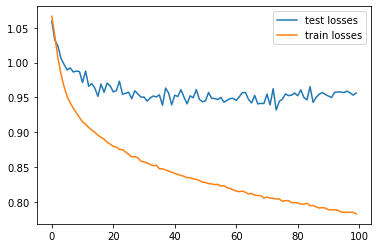

100%|██████████| 1178/1178 [00:00<00:00, 3473.62it/s]


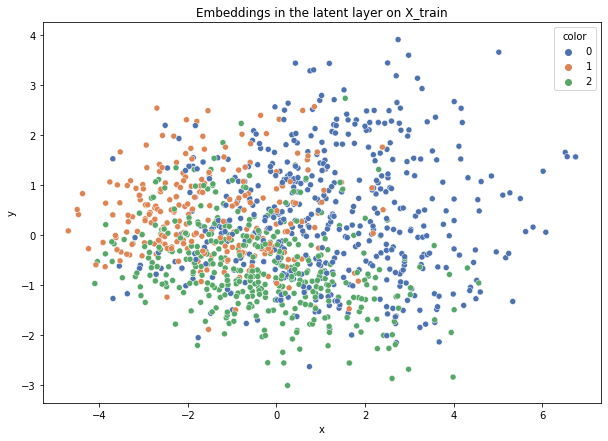

Softmax-f1: 0.512
Softmax-gmean: 0.482


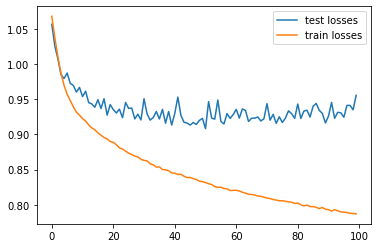

100%|██████████| 1179/1179 [00:00<00:00, 3424.67it/s]


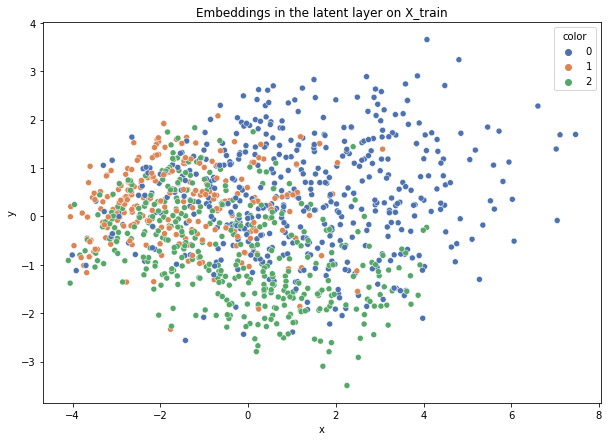

Softmax-f1: 0.496
Softmax-gmean: 0.458


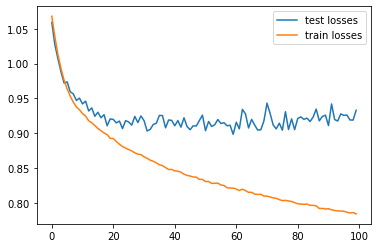

100%|██████████| 1179/1179 [00:00<00:00, 3496.92it/s]


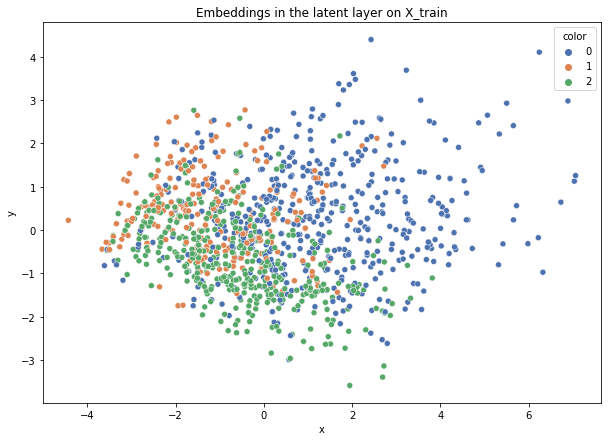

Softmax-f1: 0.556
Softmax-gmean: 0.538
dermatology


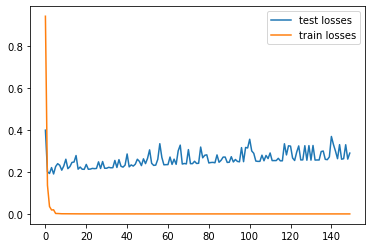

100%|██████████| 292/292 [00:00<00:00, 3365.37it/s]


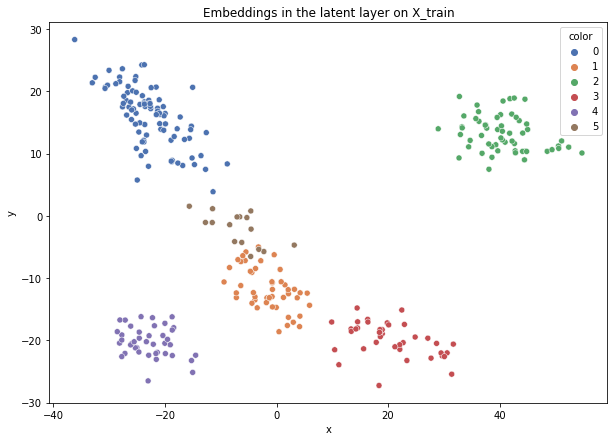

Softmax-f1: 0.944
Softmax-gmean: 0.937


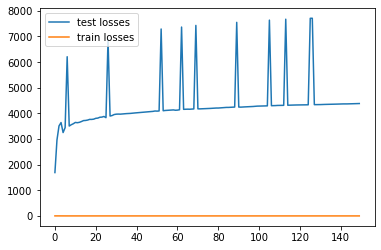

100%|██████████| 293/293 [00:00<00:00, 3312.83it/s]


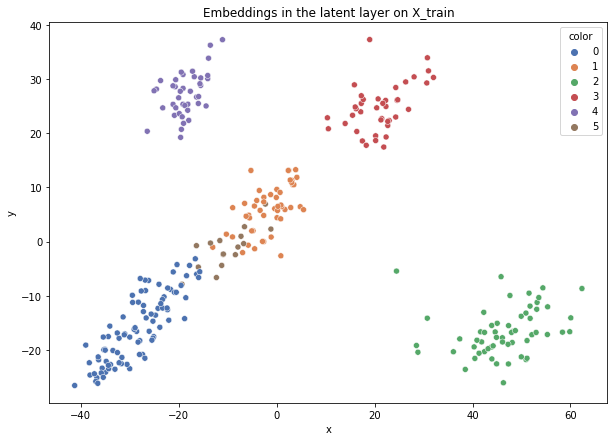

Softmax-f1: 0.927
Softmax-gmean: 0.923


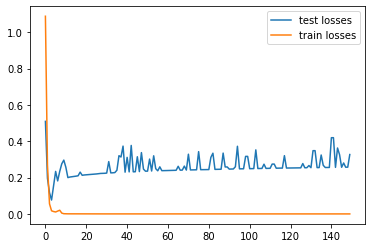

100%|██████████| 293/293 [00:00<00:00, 3430.50it/s]


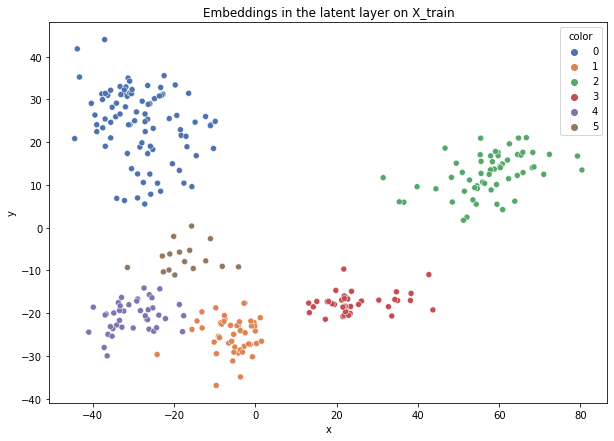

Softmax-f1: 0.927
Softmax-gmean: 0.935


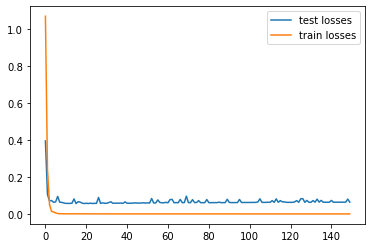

100%|██████████| 293/293 [00:00<00:00, 2030.99it/s]


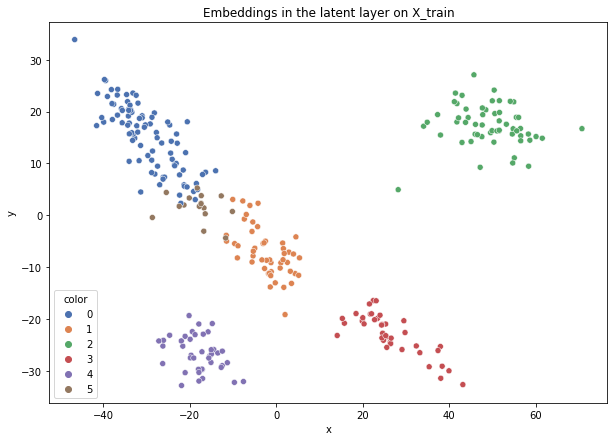

Softmax-f1: 0.954
Softmax-gmean: 0.95


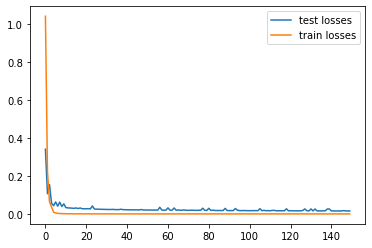

100%|██████████| 293/293 [00:00<00:00, 3375.69it/s]


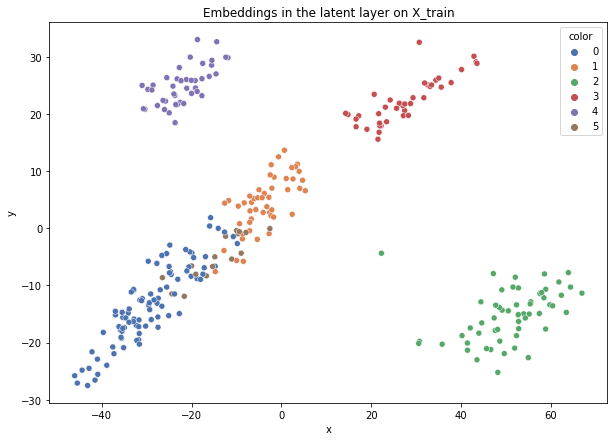

Softmax-f1: 0.989
Softmax-gmean: 0.992
hayes-roth


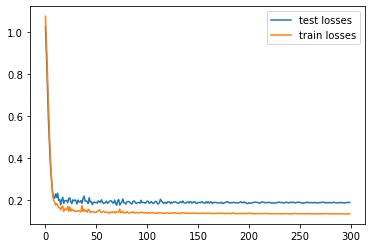

100%|██████████| 128/128 [00:00<00:00, 3201.45it/s]


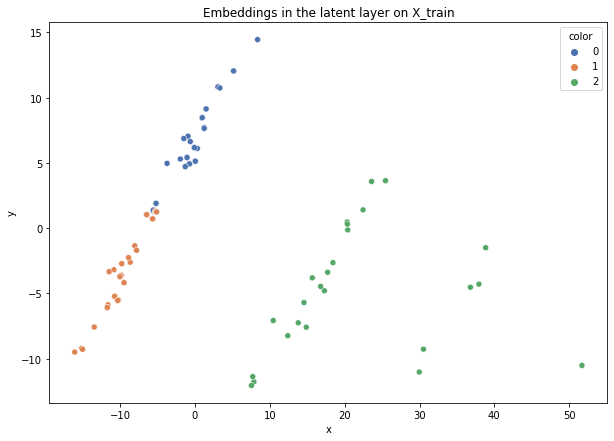

Softmax-f1: 0.842
Softmax-gmean: 0.828


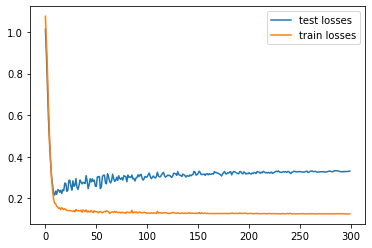

100%|██████████| 128/128 [00:00<00:00, 3394.48it/s]


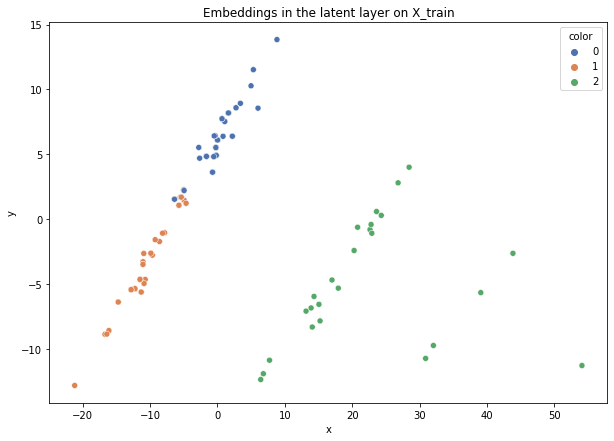

Softmax-f1: 0.845
Softmax-gmean: 0.837


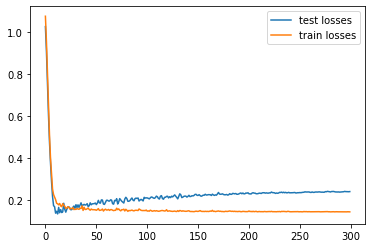

100%|██████████| 128/128 [00:00<00:00, 3314.57it/s]


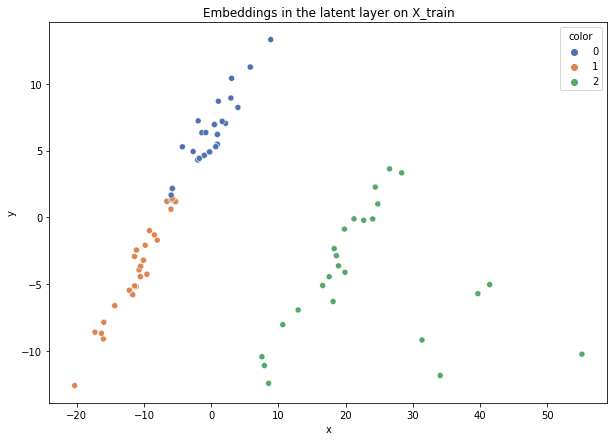

Softmax-f1: 0.923
Softmax-gmean: 0.921


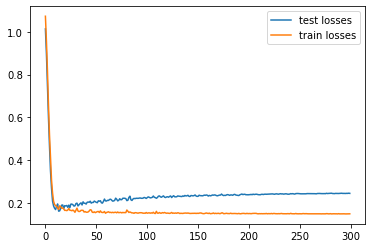

100%|██████████| 128/128 [00:00<00:00, 3488.37it/s]


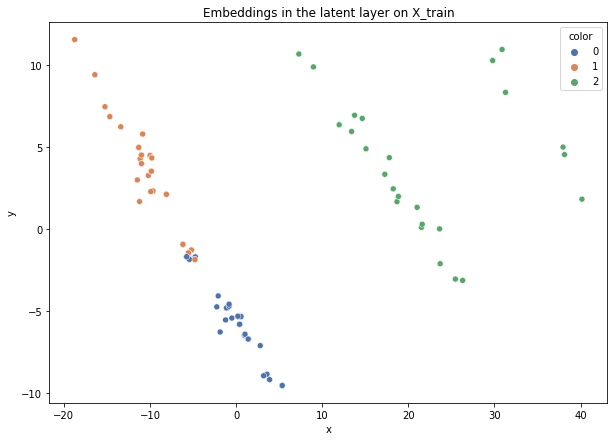

Softmax-f1: 0.949
Softmax-gmean: 0.948


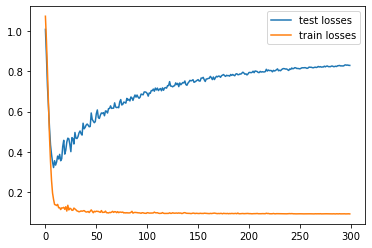

100%|██████████| 128/128 [00:00<00:00, 3342.16it/s]


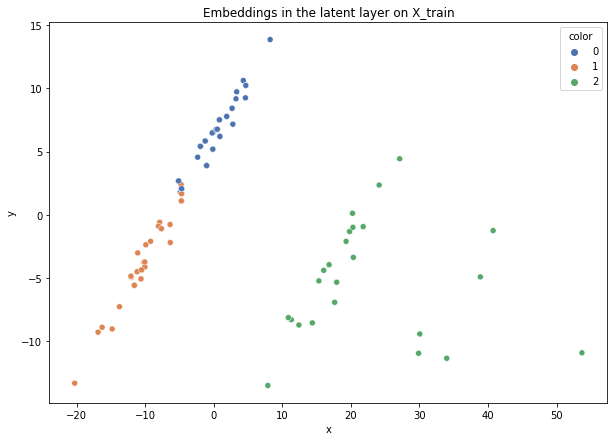

Softmax-f1: 0.786
Softmax-gmean: 0.773
new_vehicle


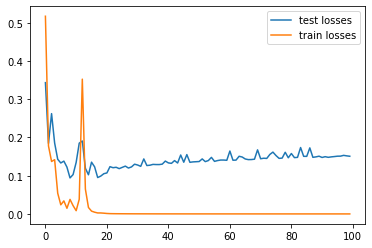

100%|██████████| 676/676 [00:00<00:00, 2594.66it/s]


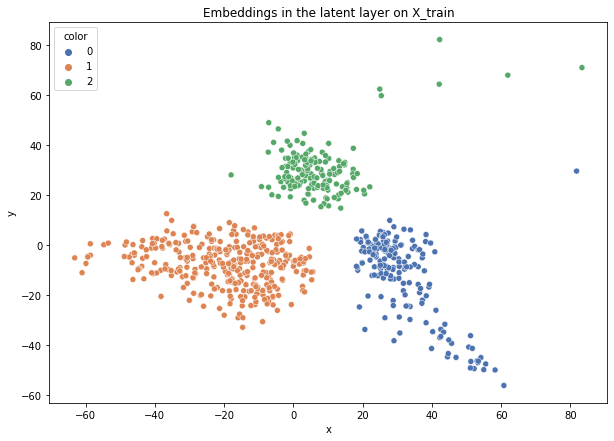

Softmax-f1: 0.953
Softmax-gmean: 0.957


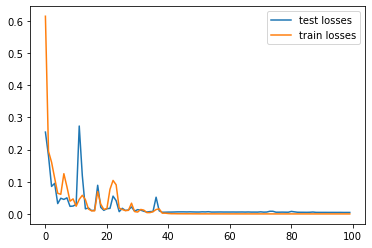

100%|██████████| 677/677 [00:00<00:00, 3357.98it/s]


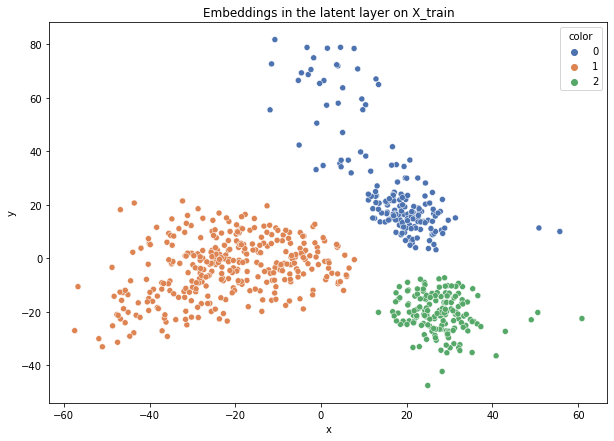

Softmax-f1: 1.0
Softmax-gmean: 1.0


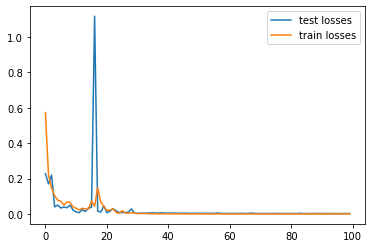

100%|██████████| 677/677 [00:00<00:00, 3491.30it/s]


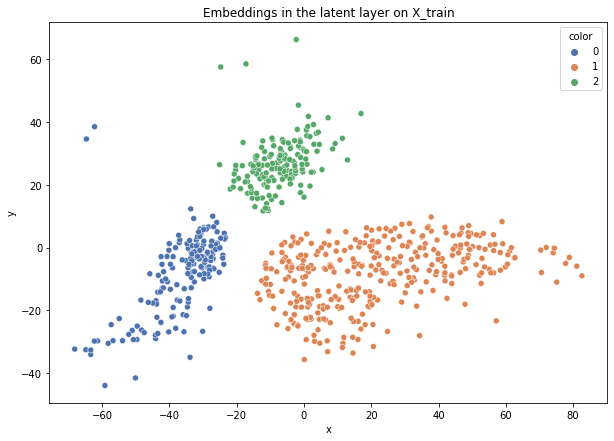

Softmax-f1: 1.0
Softmax-gmean: 1.0


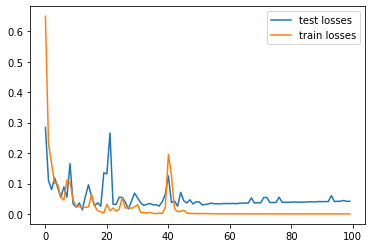

100%|██████████| 677/677 [00:00<00:00, 3482.71it/s]


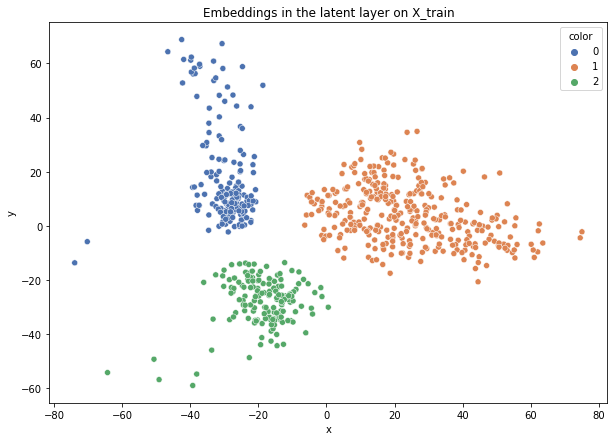

Softmax-f1: 0.988
Softmax-gmean: 0.988


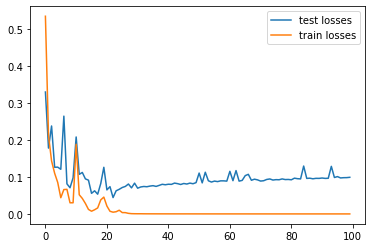

100%|██████████| 677/677 [00:00<00:00, 3408.35it/s]


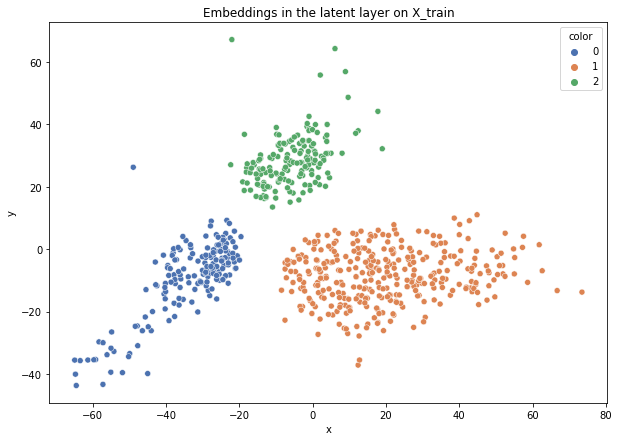

Softmax-f1: 0.963
Softmax-gmean: 0.96
new_yeast


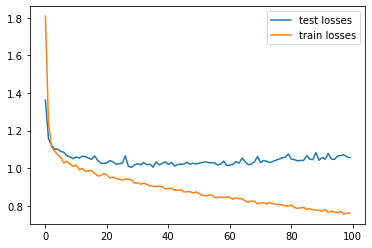

100%|██████████| 1187/1187 [00:00<00:00, 3519.47it/s]


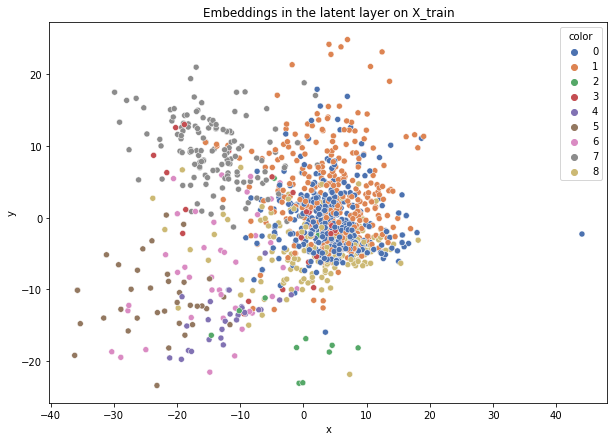

Softmax-f1: 0.572
Softmax-gmean: 0.313


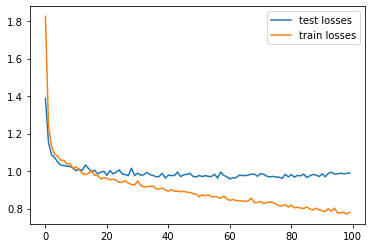

100%|██████████| 1187/1187 [00:00<00:00, 3464.74it/s]


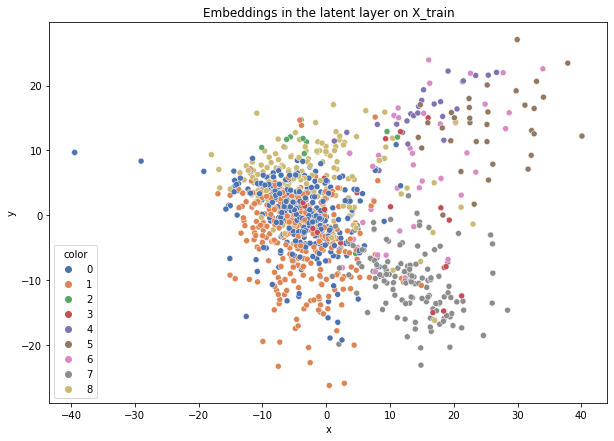

Softmax-f1: 0.594
Softmax-gmean: 0.314


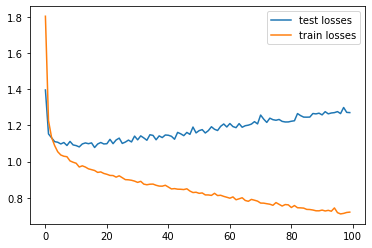

100%|██████████| 1187/1187 [00:00<00:00, 3458.37it/s]


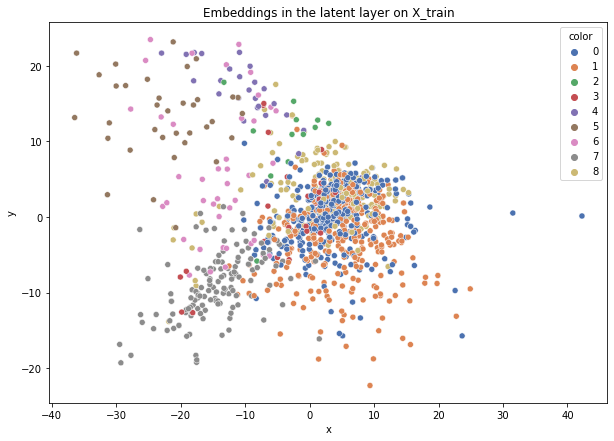

Softmax-f1: 0.494
Softmax-gmean: 0.268


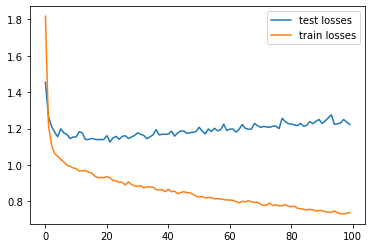

100%|██████████| 1187/1187 [00:00<00:00, 3461.04it/s]


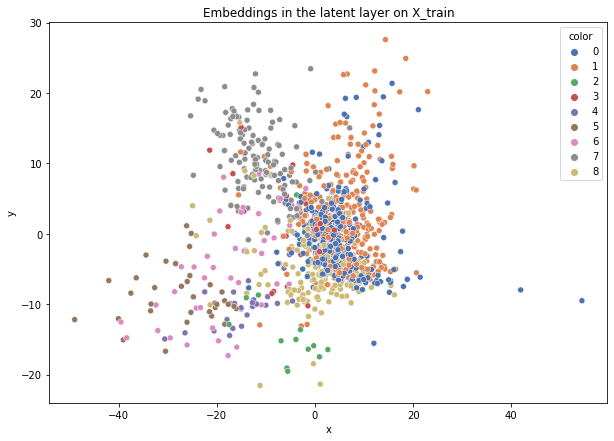

Softmax-f1: 0.492
Softmax-gmean: 0.251


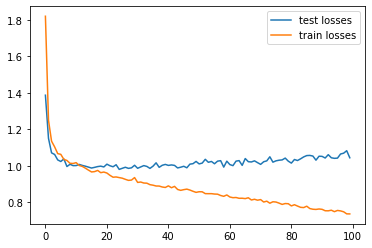

100%|██████████| 1188/1188 [00:00<00:00, 3464.10it/s]


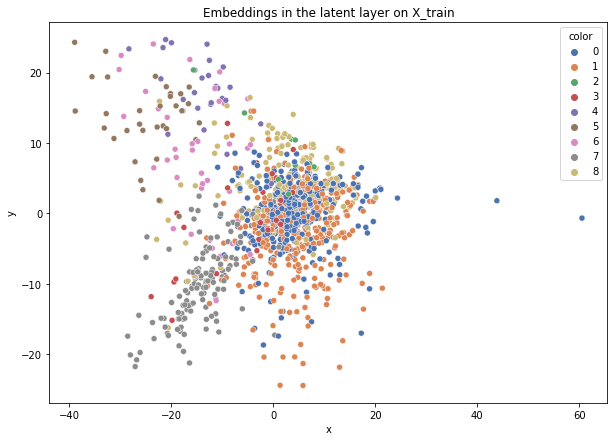

Softmax-f1: 0.543
Softmax-gmean: 0.283
1czysty-cut


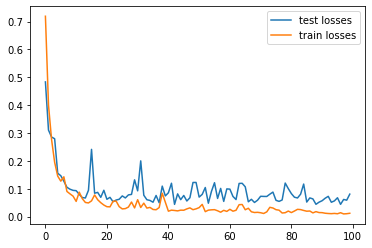

100%|██████████| 960/960 [00:00<00:00, 3533.56it/s]


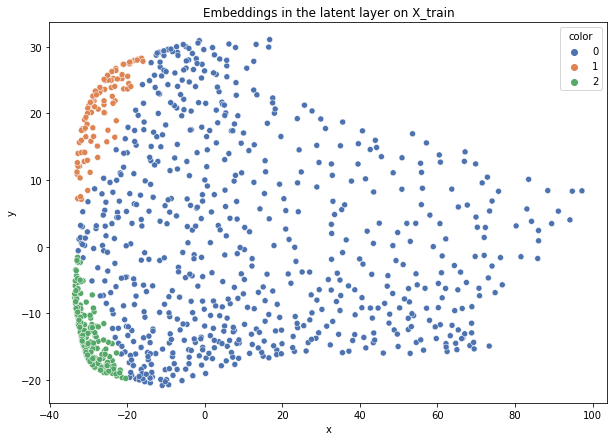

Softmax-f1: 0.971
Softmax-gmean: 0.98


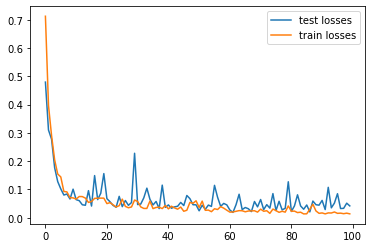

100%|██████████| 960/960 [00:00<00:00, 3500.65it/s]


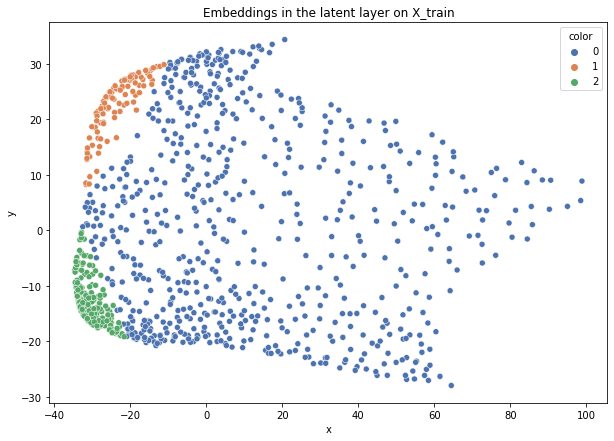

Softmax-f1: 0.975
Softmax-gmean: 0.968


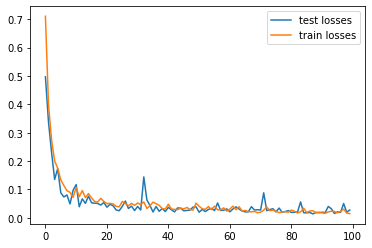

100%|██████████| 960/960 [00:00<00:00, 3345.75it/s]


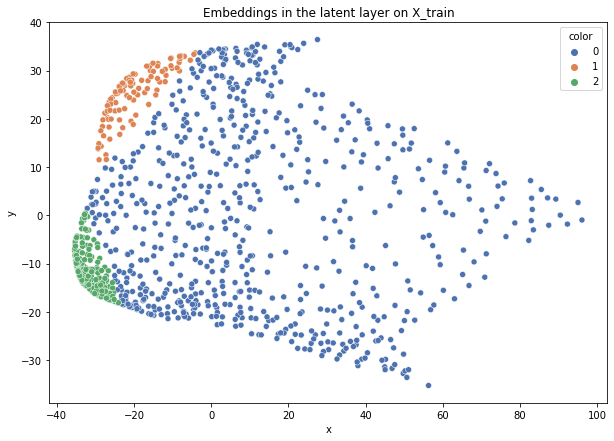

Softmax-f1: 0.983
Softmax-gmean: 0.994


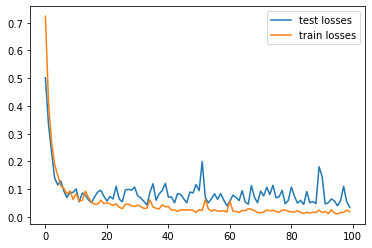

100%|██████████| 960/960 [00:00<00:00, 2845.52it/s]


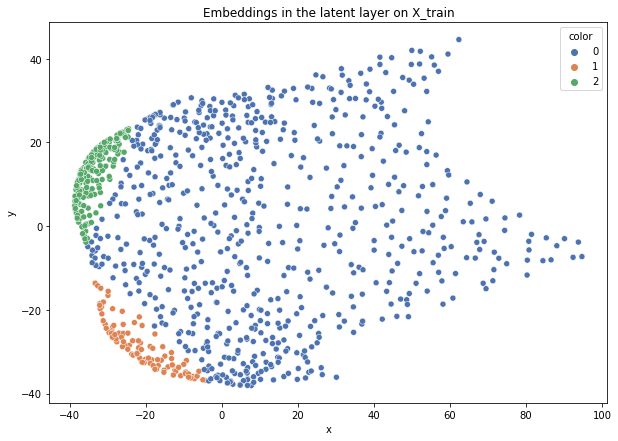

Softmax-f1: 0.979
Softmax-gmean: 0.975


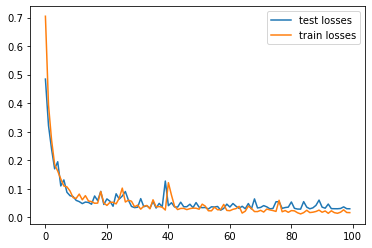

100%|██████████| 960/960 [00:00<00:00, 3557.78it/s]


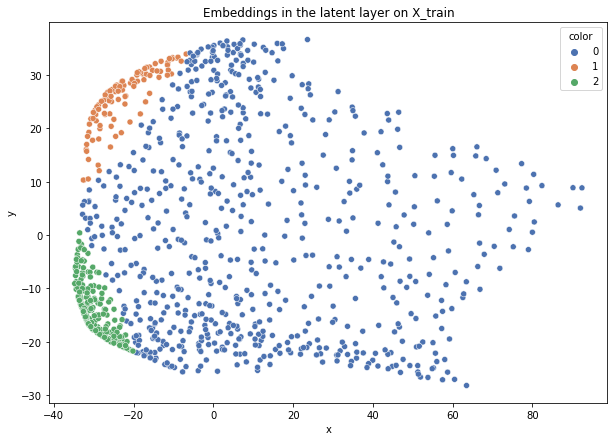

Softmax-f1: 0.978
Softmax-gmean: 0.97
2delikatne-cut


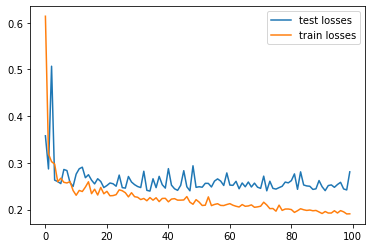

100%|██████████| 960/960 [00:00<00:00, 2777.48it/s]


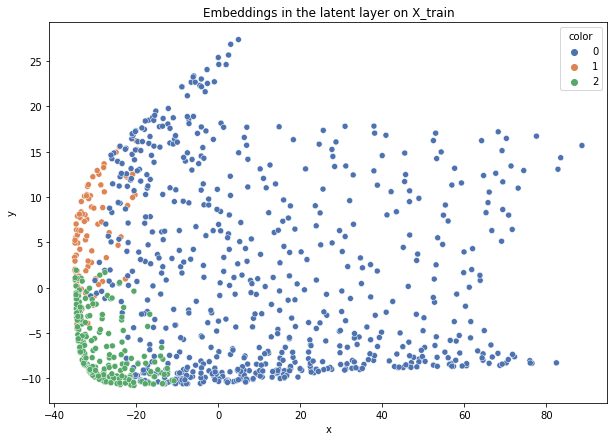

Softmax-f1: 0.795
Softmax-gmean: 0.803


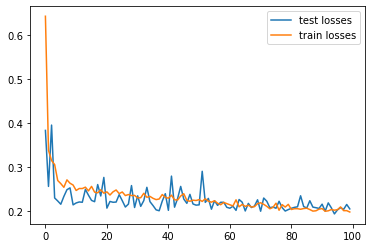

100%|██████████| 960/960 [00:00<00:00, 3431.97it/s]


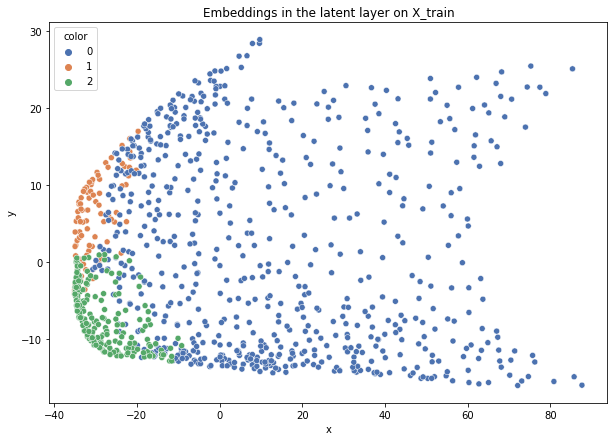

Softmax-f1: 0.806
Softmax-gmean: 0.786


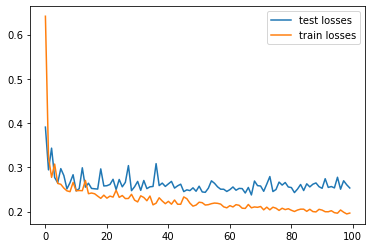

100%|██████████| 960/960 [00:00<00:00, 3452.19it/s]


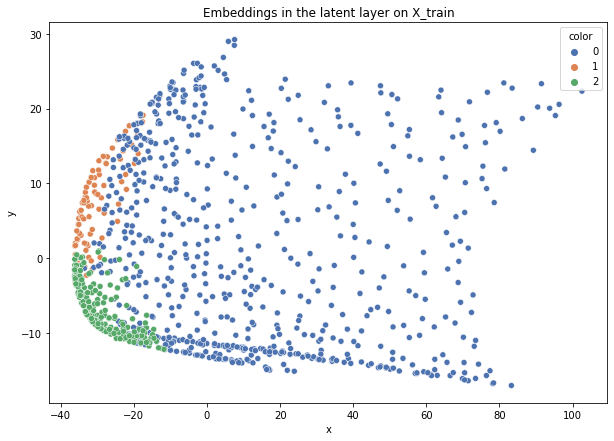

Softmax-f1: 0.779
Softmax-gmean: 0.739


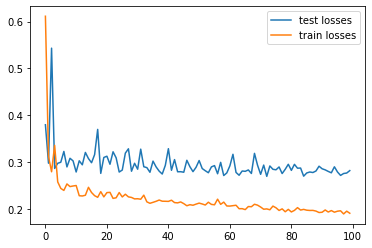

100%|██████████| 960/960 [00:00<00:00, 3540.24it/s]


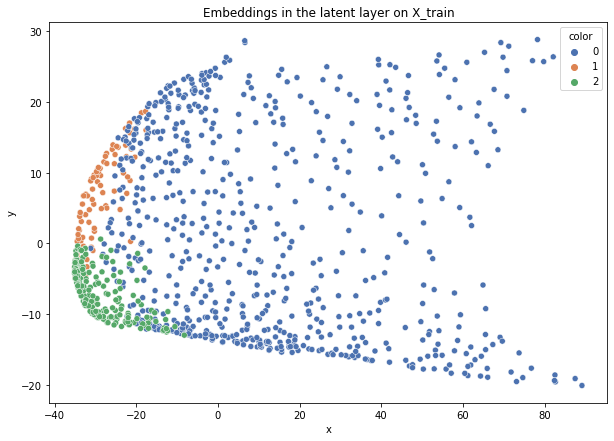

Softmax-f1: 0.784
Softmax-gmean: 0.767


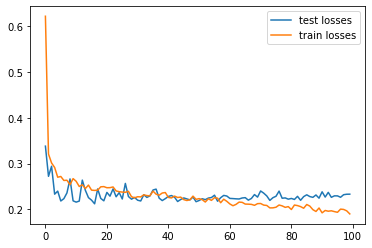

100%|██████████| 960/960 [00:00<00:00, 3558.93it/s]


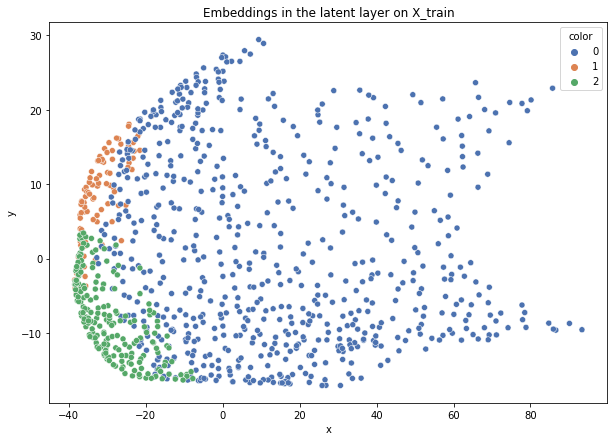

Softmax-f1: 0.785
Softmax-gmean: 0.713
3mocniej-cut


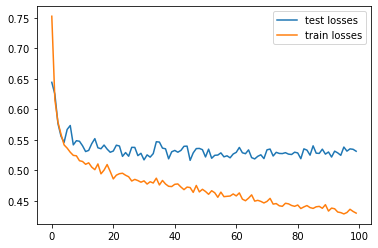

100%|██████████| 960/960 [00:00<00:00, 2895.41it/s]


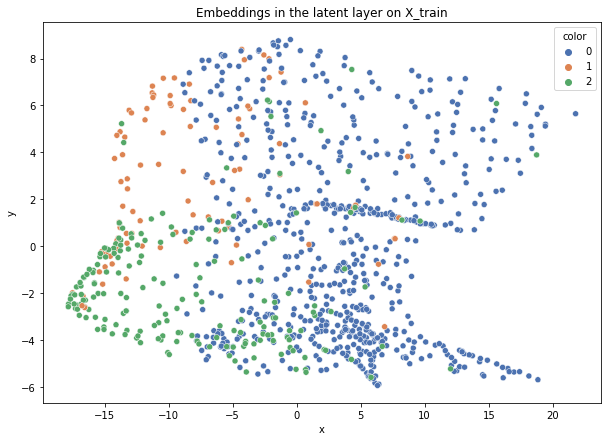

Softmax-f1: 0.622
Softmax-gmean: 0.522


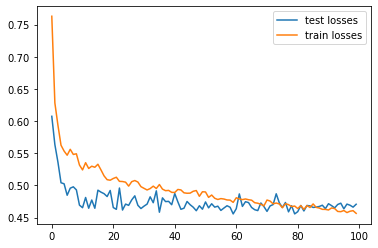

100%|██████████| 960/960 [00:00<00:00, 3454.00it/s]


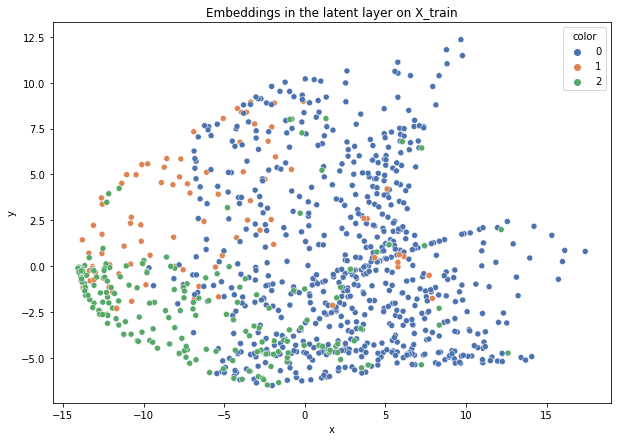

Softmax-f1: 0.744
Softmax-gmean: 0.653


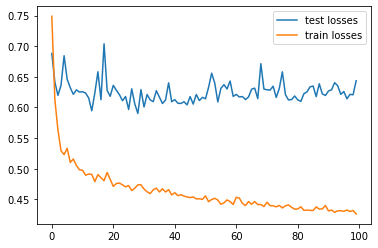

100%|██████████| 960/960 [00:00<00:00, 3426.26it/s]


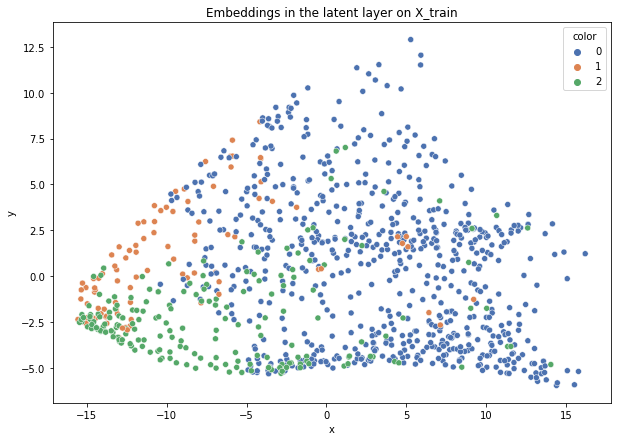

Softmax-f1: 0.523
Softmax-gmean: 0.39


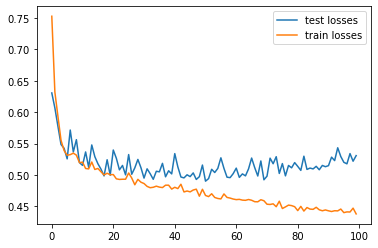

100%|██████████| 960/960 [00:00<00:00, 3474.34it/s]


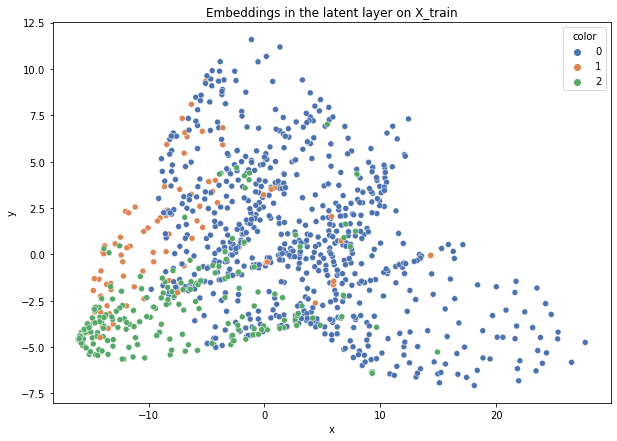

Softmax-f1: 0.622
Softmax-gmean: 0.527


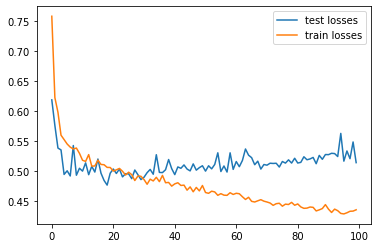

100%|██████████| 960/960 [00:00<00:00, 3553.92it/s]


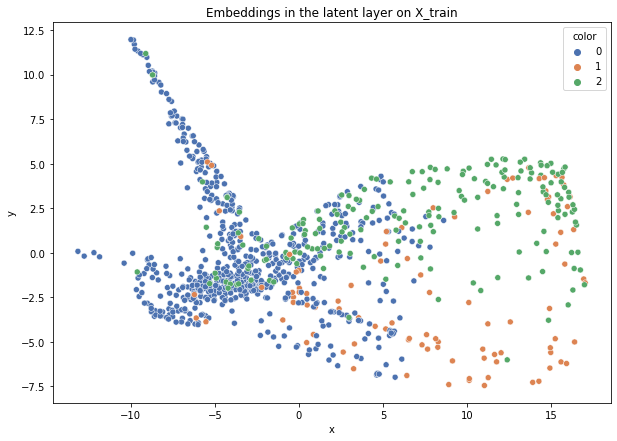

Softmax-f1: 0.601
Softmax-gmean: 0.46
4delikatne-bezover-cut


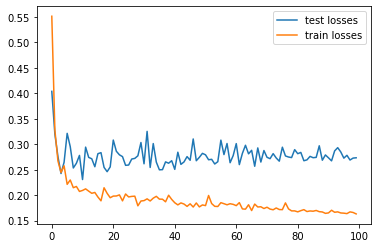

100%|██████████| 960/960 [00:00<00:00, 3419.31it/s]


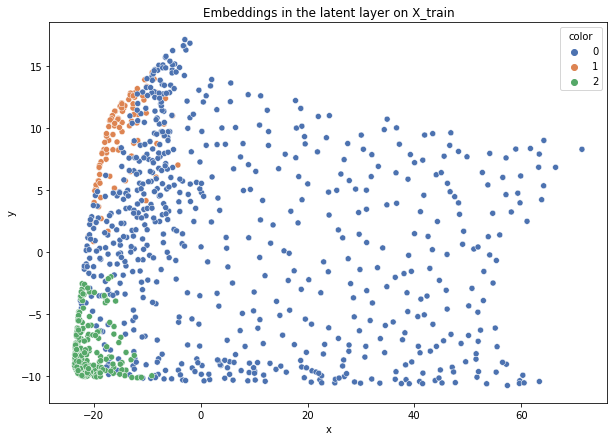

Softmax-f1: 0.829
Softmax-gmean: 0.805


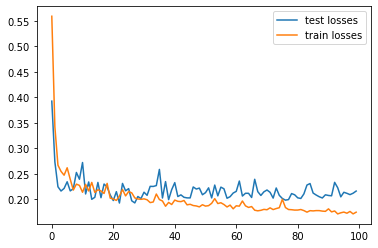

100%|██████████| 960/960 [00:00<00:00, 3522.52it/s]


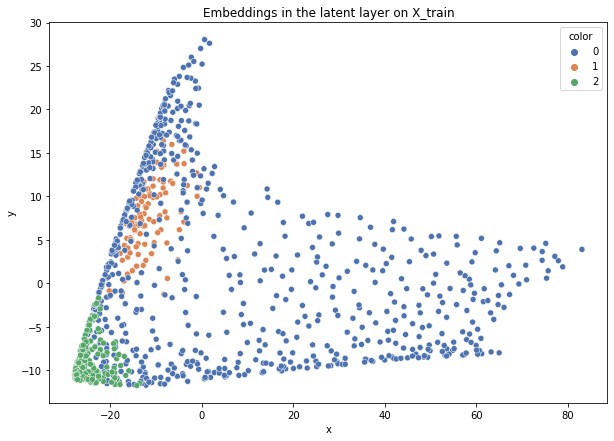

Softmax-f1: 0.829
Softmax-gmean: 0.844


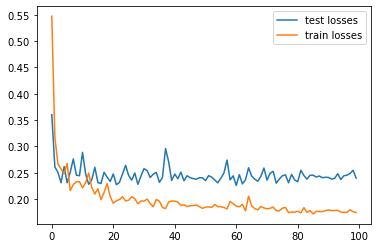

100%|██████████| 960/960 [00:00<00:00, 3478.43it/s]


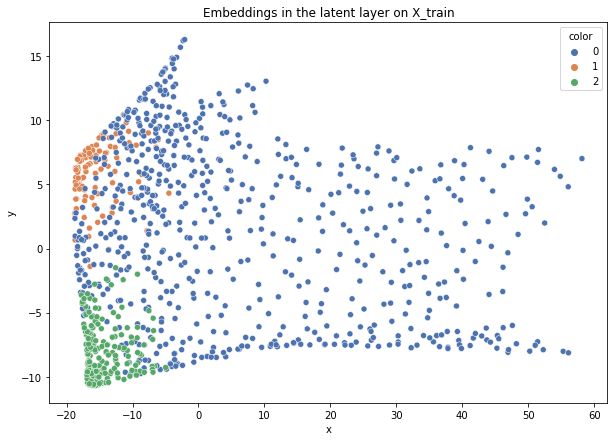

Softmax-f1: 0.815
Softmax-gmean: 0.773


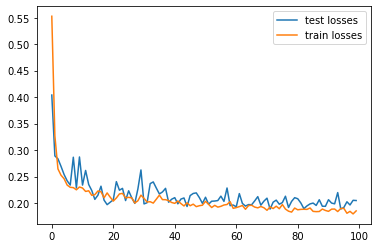

100%|██████████| 960/960 [00:00<00:00, 3404.48it/s]


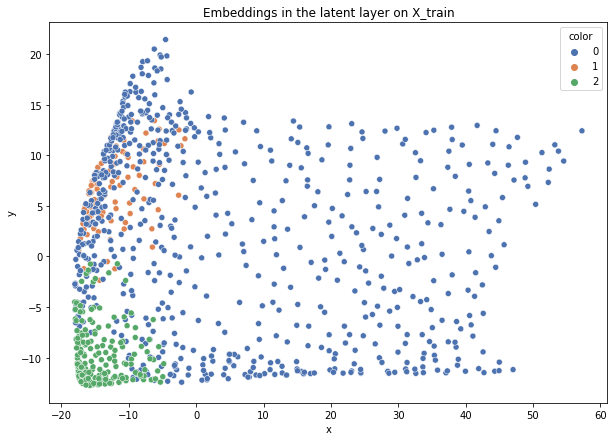

Softmax-f1: 0.855
Softmax-gmean: 0.88


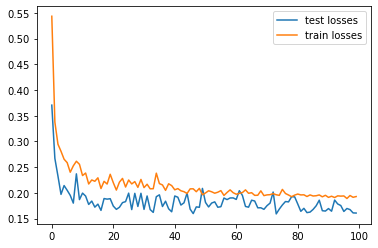

100%|██████████| 960/960 [00:00<00:00, 3408.85it/s]


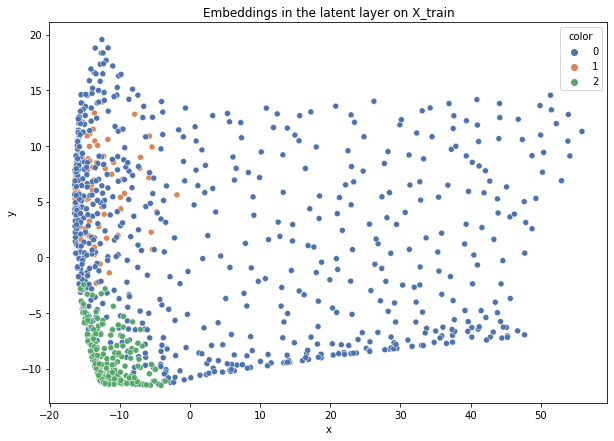

Softmax-f1: 0.89
Softmax-gmean: 0.906
balance-scale


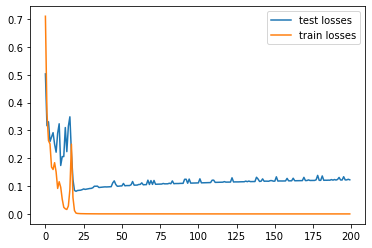

100%|██████████| 500/500 [00:00<00:00, 3325.31it/s]


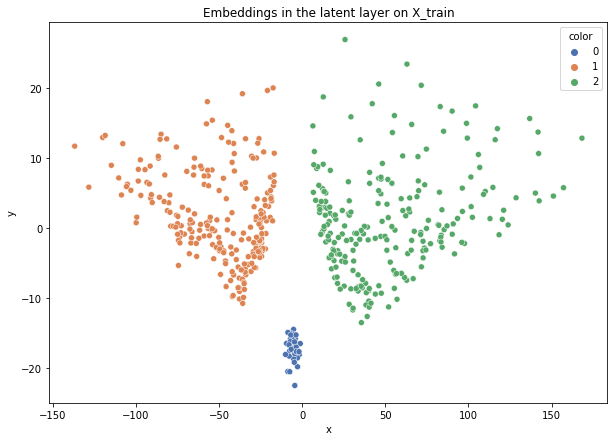

Softmax-f1: 0.983
Softmax-gmean: 0.982


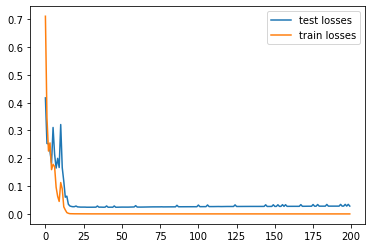

100%|██████████| 500/500 [00:00<00:00, 3500.73it/s]


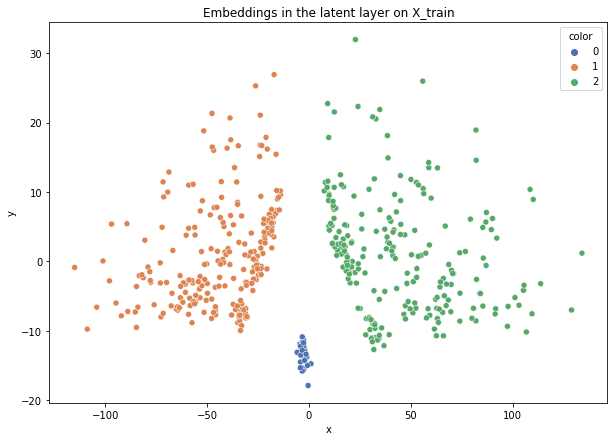

Softmax-f1: 0.994
Softmax-gmean: 0.994


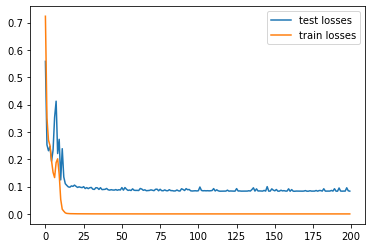

100%|██████████| 500/500 [00:00<00:00, 3363.08it/s]


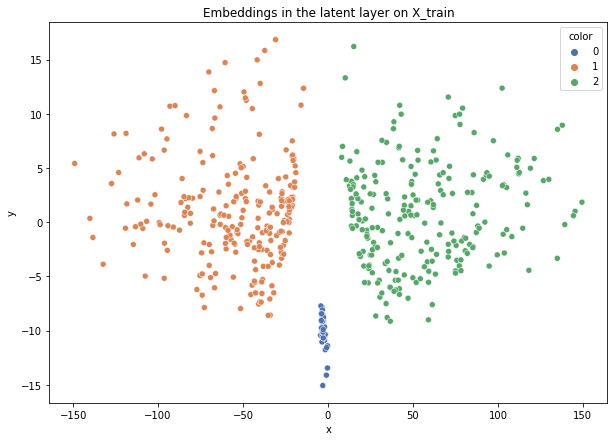

Softmax-f1: 0.948
Softmax-gmean: 0.982


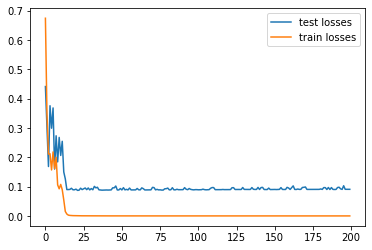

100%|██████████| 500/500 [00:00<00:00, 2484.83it/s]


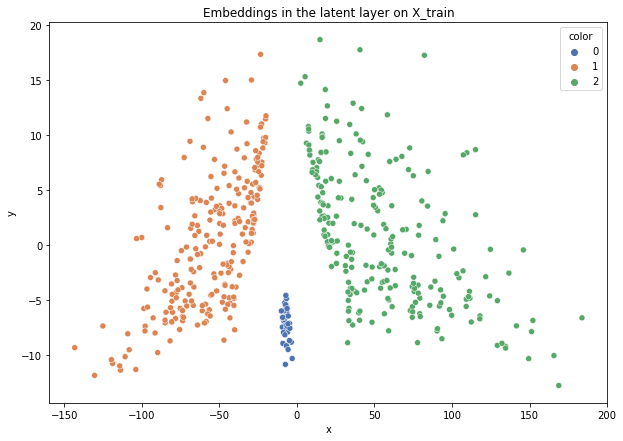

Softmax-f1: 0.952
Softmax-gmean: 0.976


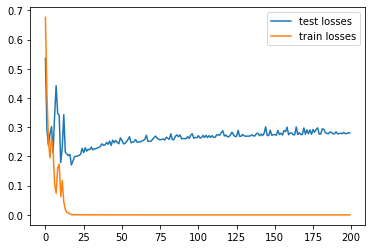

100%|██████████| 500/500 [00:00<00:00, 3456.21it/s]


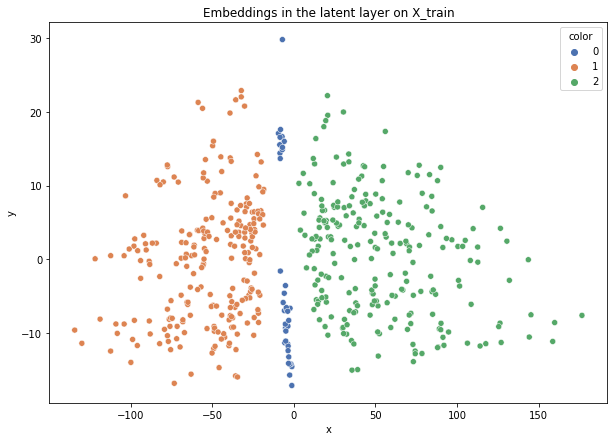

Softmax-f1: 0.871
Softmax-gmean: 0.848
cleveland


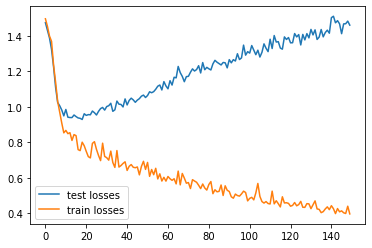

100%|██████████| 242/242 [00:00<00:00, 3477.97it/s]


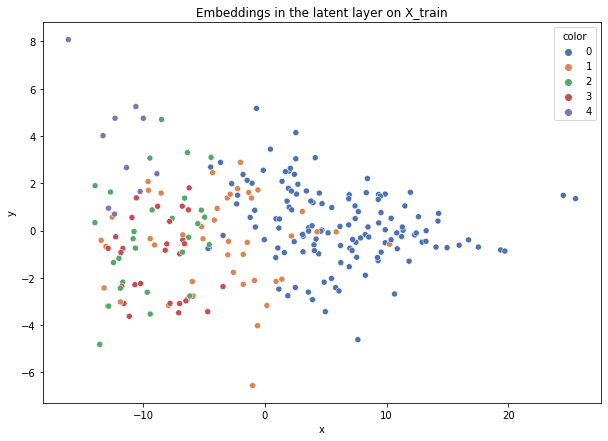

Softmax-f1: 0.373
Softmax-gmean: 0.121


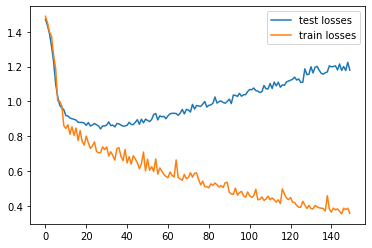

100%|██████████| 242/242 [00:00<00:00, 3374.95it/s]


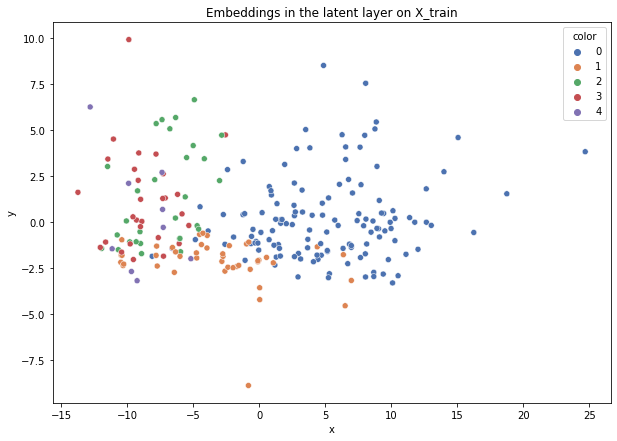

Softmax-f1: 0.34
Softmax-gmean: 0.109


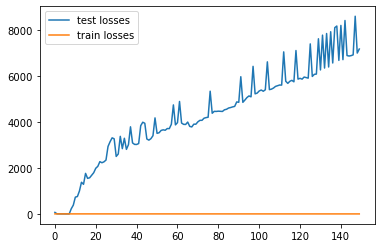

100%|██████████| 242/242 [00:00<00:00, 3437.49it/s]


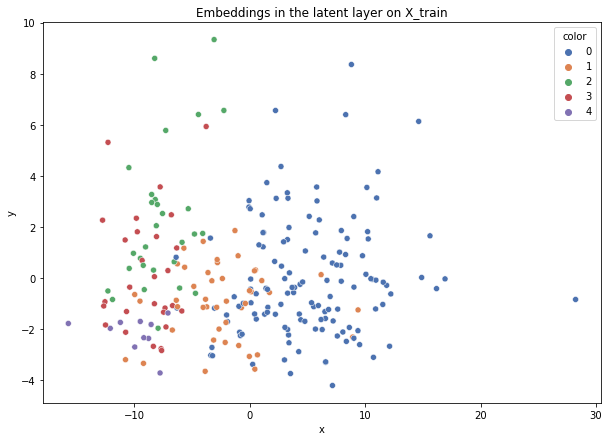

Softmax-f1: 0.281
Softmax-gmean: 0.089


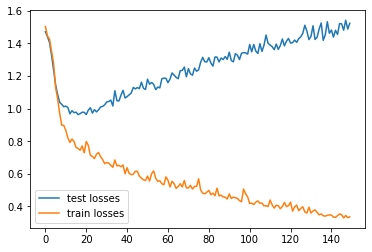

100%|██████████| 243/243 [00:00<00:00, 3307.03it/s]


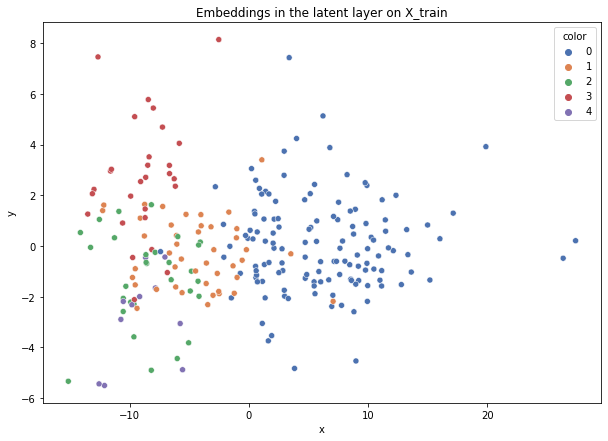

Softmax-f1: 0.206
Softmax-gmean: 0.012


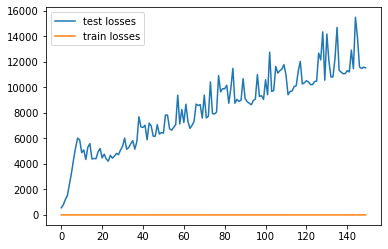

100%|██████████| 243/243 [00:00<00:00, 3337.12it/s]


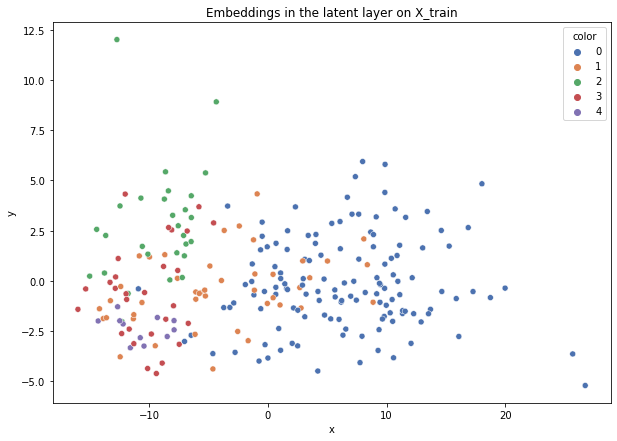

Softmax-f1: 0.355
Softmax-gmean: 0.113
cleveland_v2


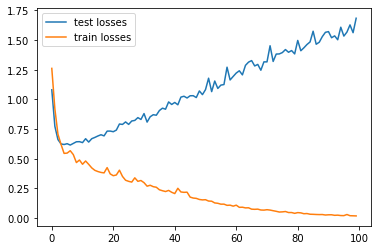

100%|██████████| 242/242 [00:00<00:00, 3415.98it/s]


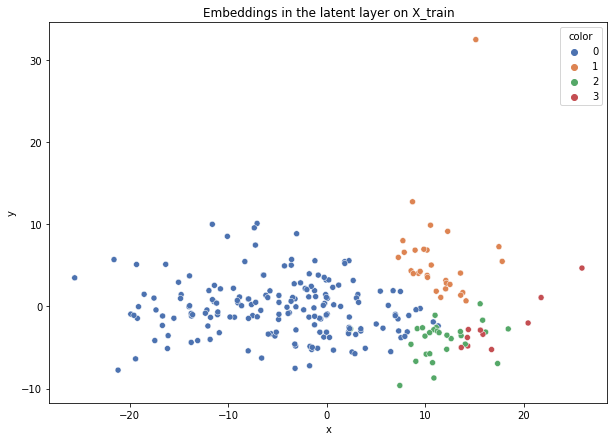

Softmax-f1: 0.342
Softmax-gmean: 0.078


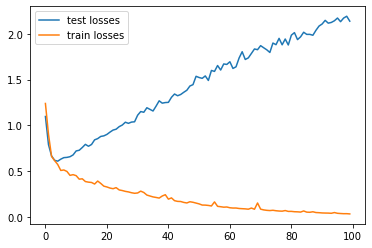

100%|██████████| 242/242 [00:00<00:00, 3422.06it/s]


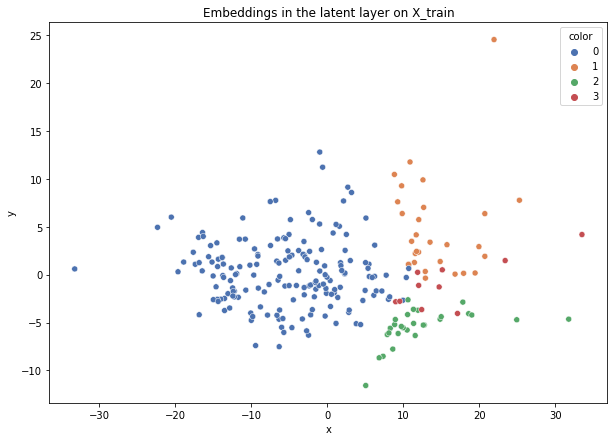

Softmax-f1: 0.304
Softmax-gmean: 0.076


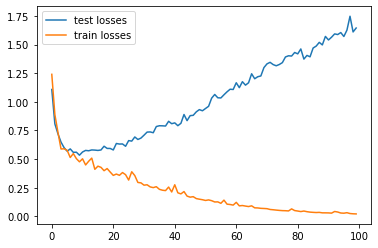

100%|██████████| 242/242 [00:00<00:00, 3375.48it/s]


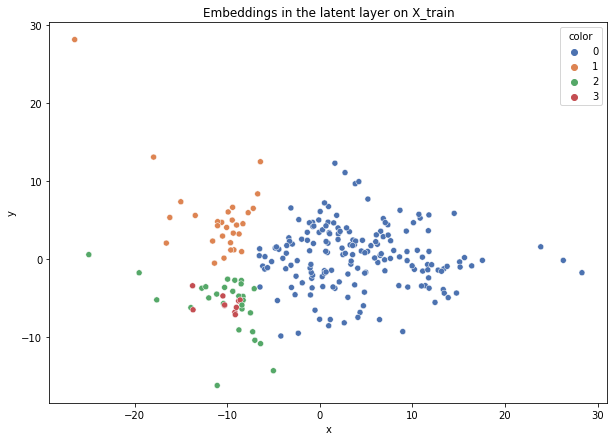

Softmax-f1: 0.256
Softmax-gmean: 0.019


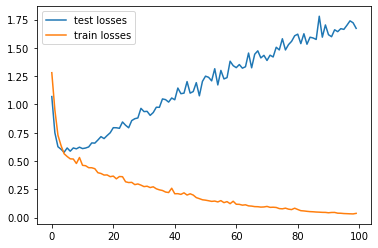

100%|██████████| 243/243 [00:00<00:00, 3150.42it/s]


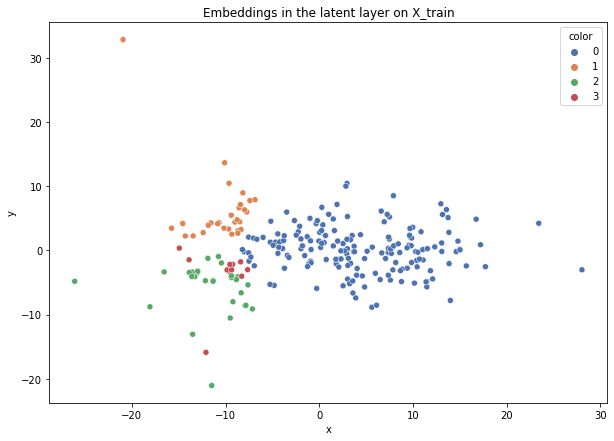

Softmax-f1: 0.318
Softmax-gmean: 0.067


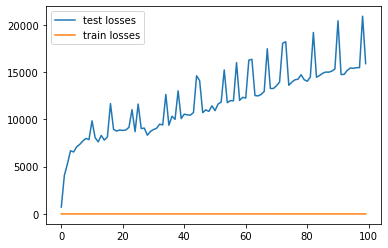

100%|██████████| 243/243 [00:00<00:00, 3313.23it/s]


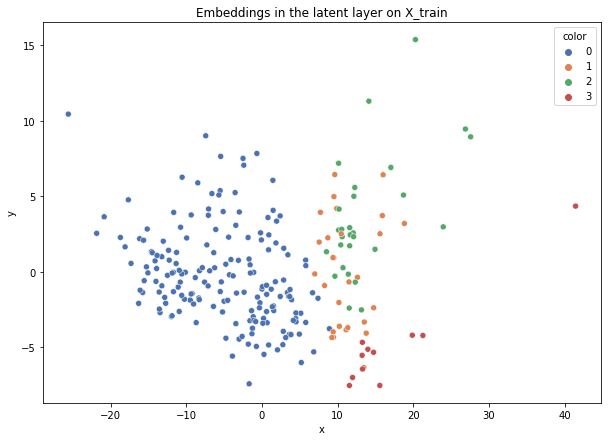

Softmax-f1: 0.42
Softmax-gmean: 0.105
glass


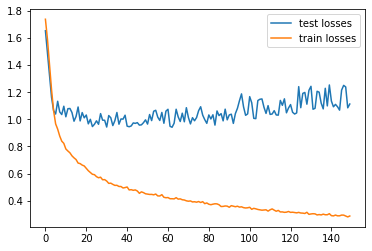

100%|██████████| 171/171 [00:00<00:00, 3427.18it/s]


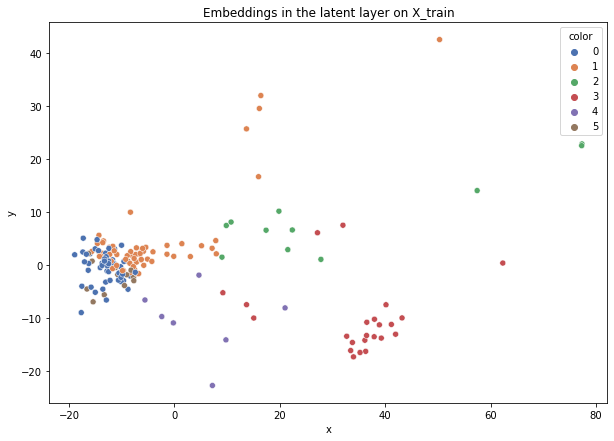

Softmax-f1: 0.618
Softmax-gmean: 0.222


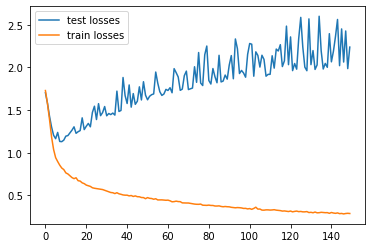

100%|██████████| 171/171 [00:00<00:00, 3290.80it/s]


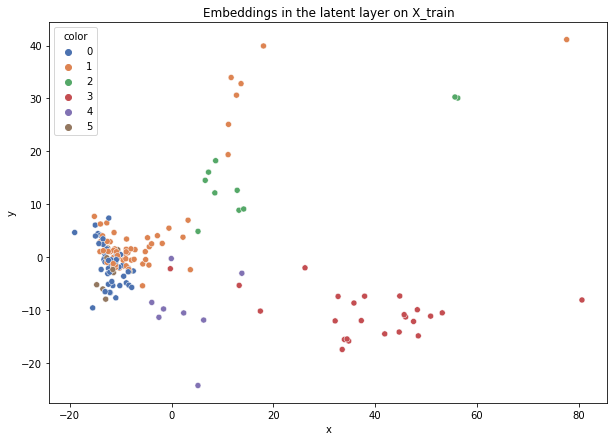

Softmax-f1: 0.511
Softmax-gmean: 0.189


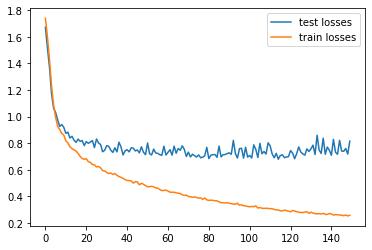

100%|██████████| 171/171 [00:00<00:00, 3245.69it/s]


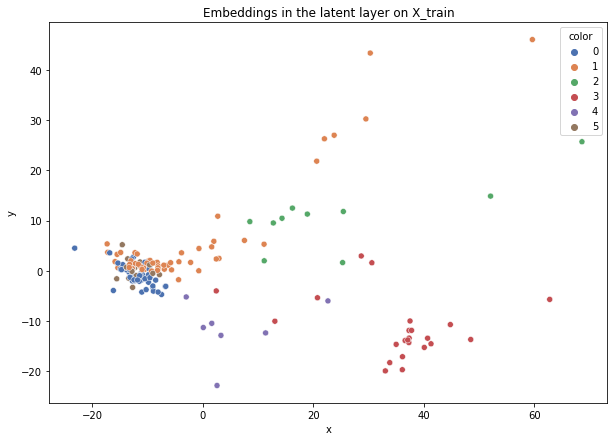

Softmax-f1: 0.759
Softmax-gmean: 0.664


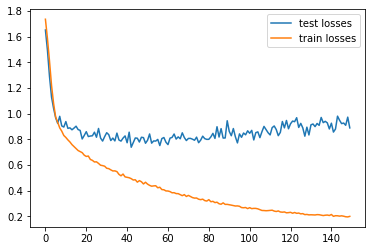

100%|██████████| 171/171 [00:00<00:00, 3294.47it/s]


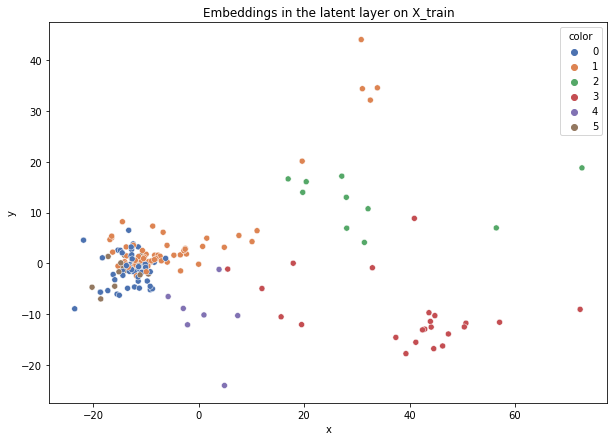

Softmax-f1: 0.697
Softmax-gmean: 0.651


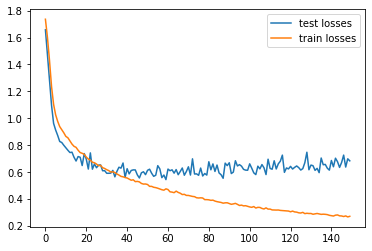

100%|██████████| 172/172 [00:00<00:00, 3285.66it/s]


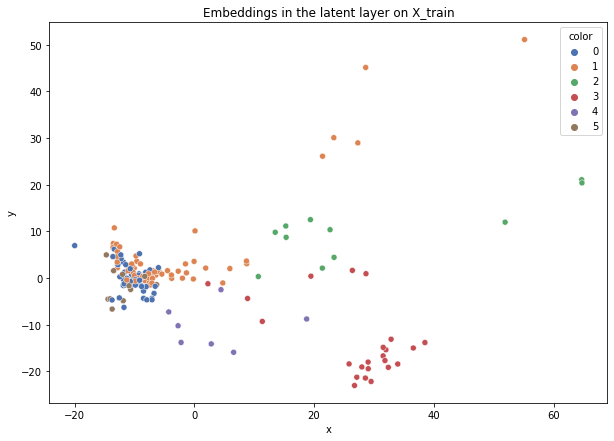

Softmax-f1: 0.792
Softmax-gmean: 0.759
new_ecoli


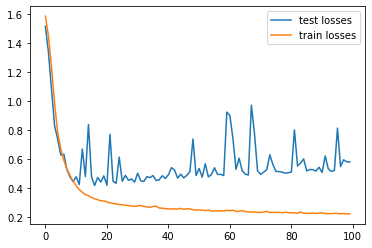

100%|██████████| 268/268 [00:00<00:00, 3357.87it/s]


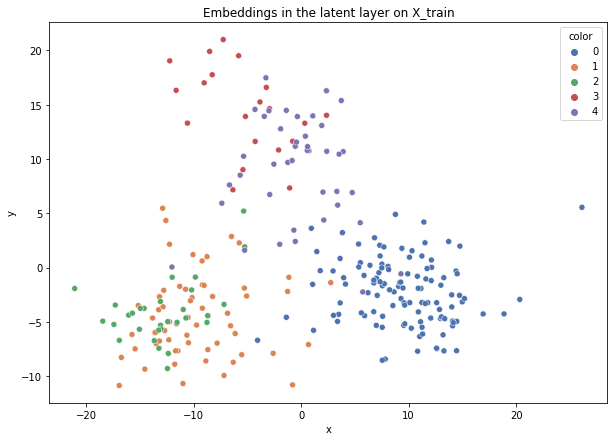

Softmax-f1: 0.772
Softmax-gmean: 0.757


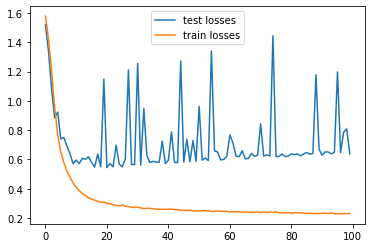

100%|██████████| 269/269 [00:00<00:00, 3362.04it/s]


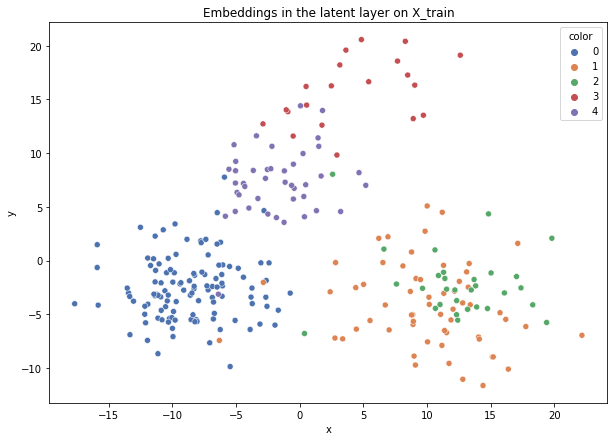

Softmax-f1: 0.831
Softmax-gmean: 0.81


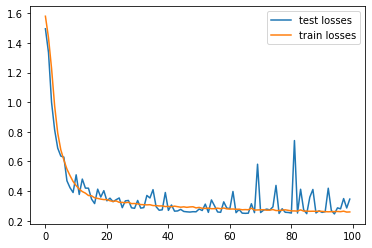

100%|██████████| 269/269 [00:00<00:00, 3509.20it/s]


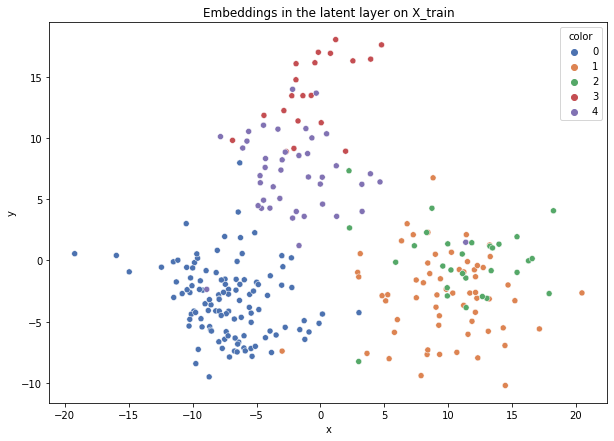

Softmax-f1: 0.941
Softmax-gmean: 0.918


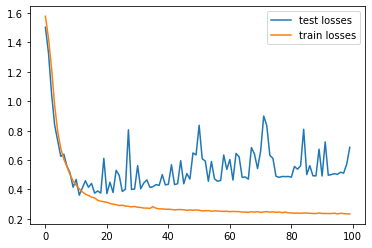

100%|██████████| 269/269 [00:00<00:00, 1887.89it/s]


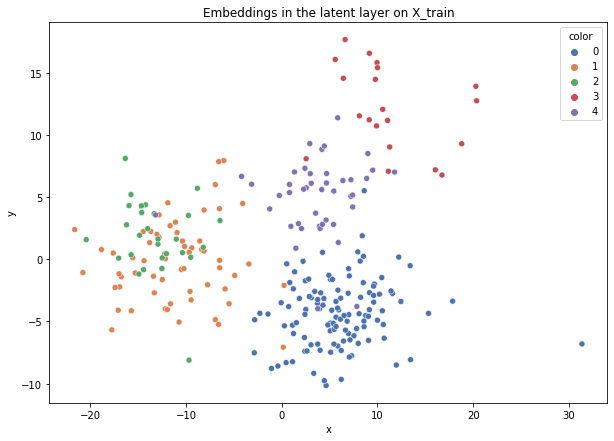

Softmax-f1: 0.745
Softmax-gmean: 0.706


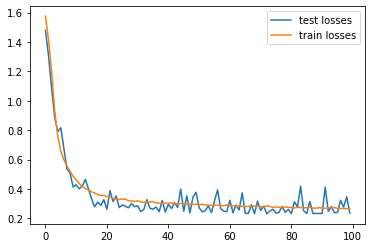

100%|██████████| 269/269 [00:00<00:00, 3331.93it/s]


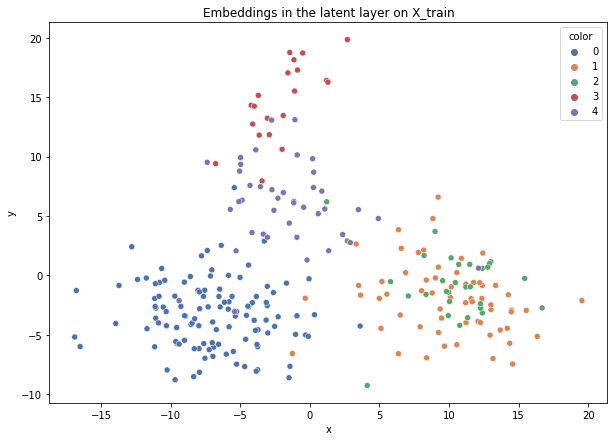

Softmax-f1: 0.811
Softmax-gmean: 0.786
new_led7digit


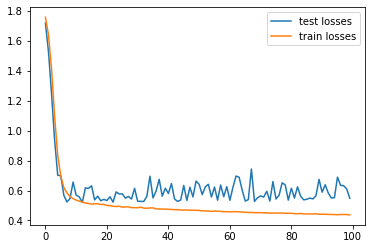

100%|██████████| 400/400 [00:00<00:00, 3514.43it/s]


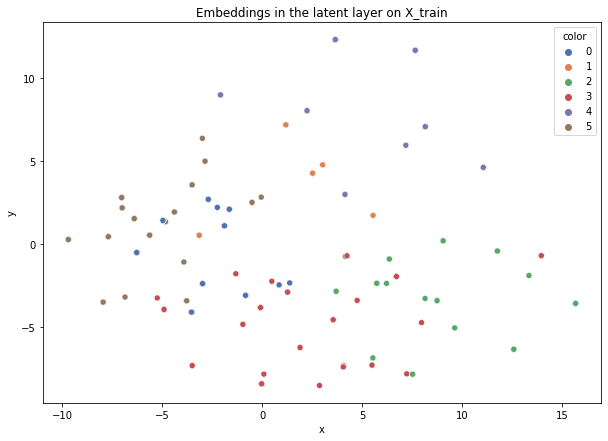

Softmax-f1: 0.773
Softmax-gmean: 0.762


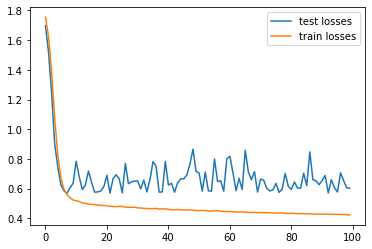

100%|██████████| 400/400 [00:00<00:00, 3476.91it/s]


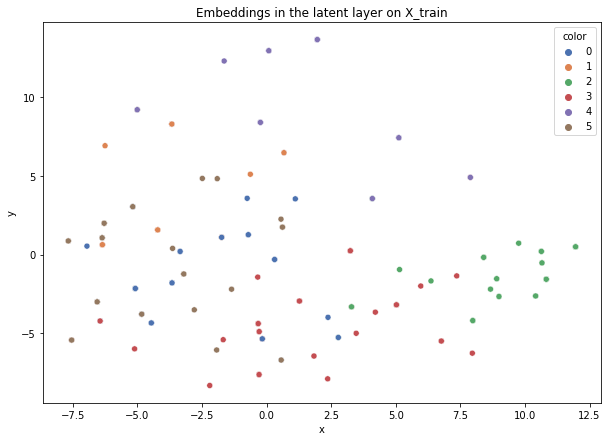

Softmax-f1: 0.748
Softmax-gmean: 0.708


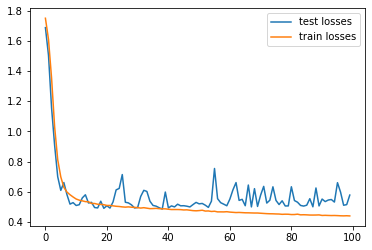

100%|██████████| 400/400 [00:00<00:00, 3311.04it/s]


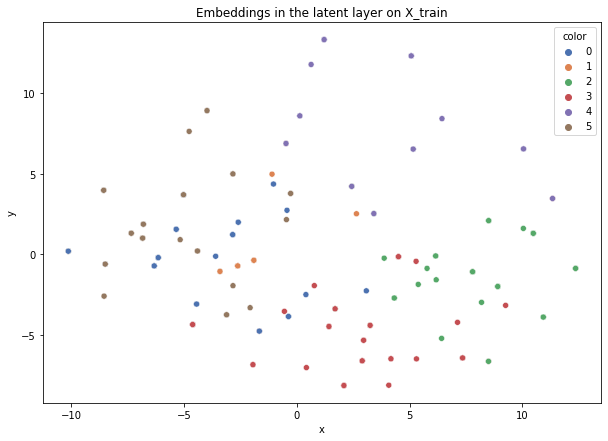

Softmax-f1: 0.778
Softmax-gmean: 0.769


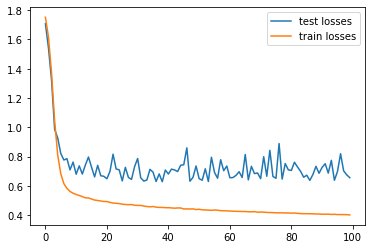

100%|██████████| 400/400 [00:00<00:00, 3461.08it/s]


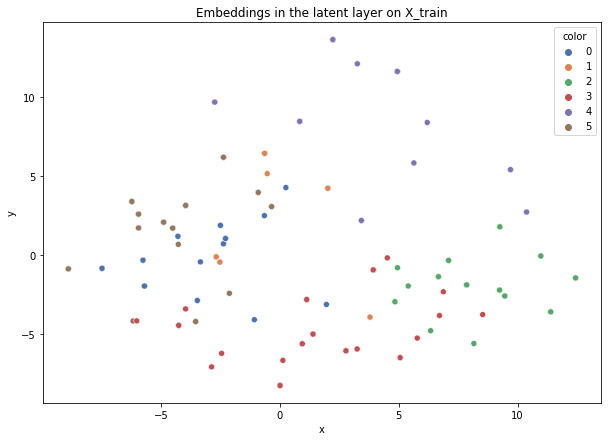

Softmax-f1: 0.728
Softmax-gmean: 0.715


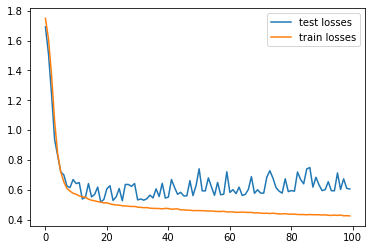

100%|██████████| 400/400 [00:00<00:00, 3404.50it/s]


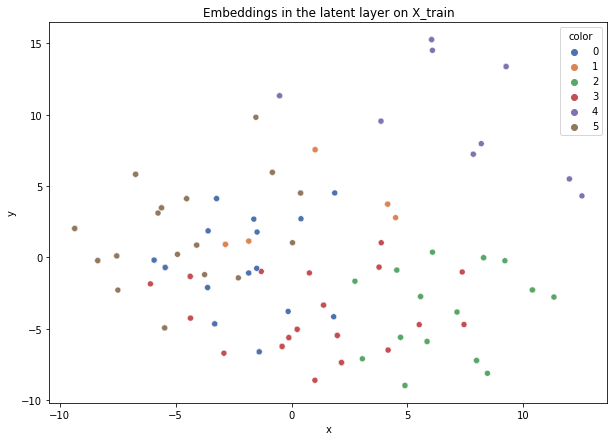

Softmax-f1: 0.786
Softmax-gmean: 0.788
new_winequality-red


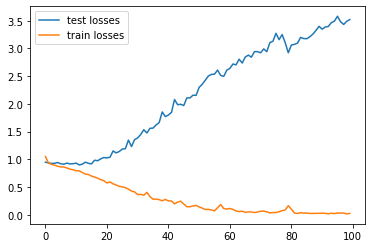

100%|██████████| 1279/1279 [00:00<00:00, 3573.94it/s]


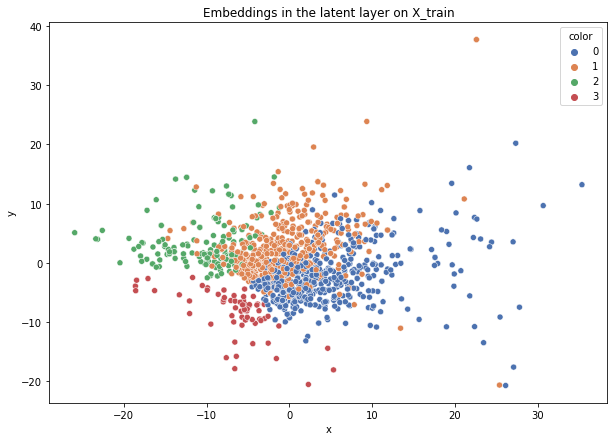

Softmax-f1: 0.482
Softmax-gmean: 0.127


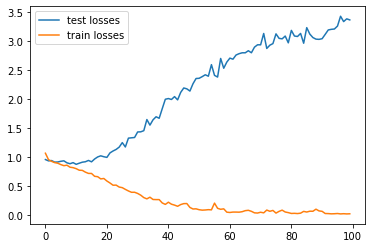

100%|██████████| 1279/1279 [00:00<00:00, 3505.05it/s]


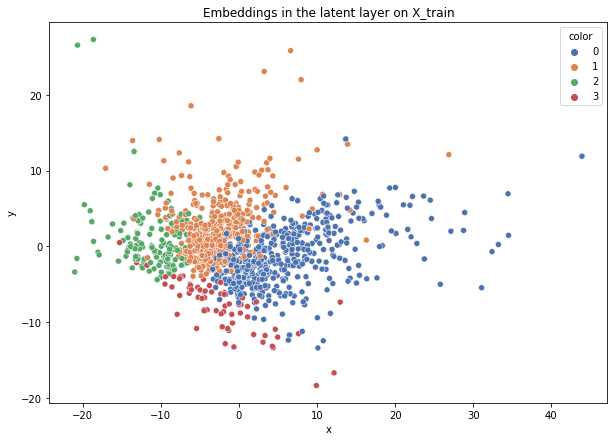

Softmax-f1: 0.505
Softmax-gmean: 0.446


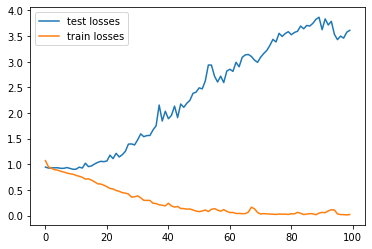

100%|██████████| 1279/1279 [00:00<00:00, 3515.00it/s]


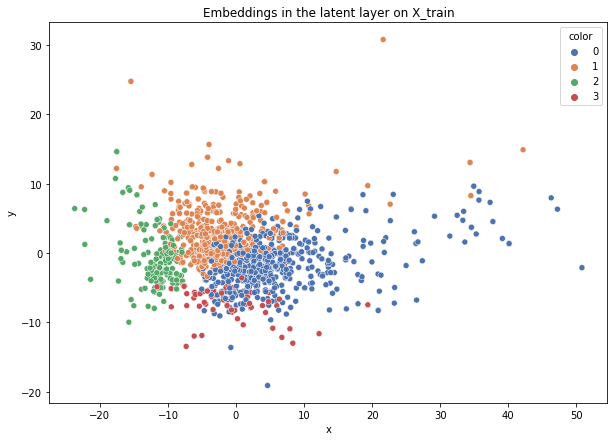

Softmax-f1: 0.524
Softmax-gmean: 0.471


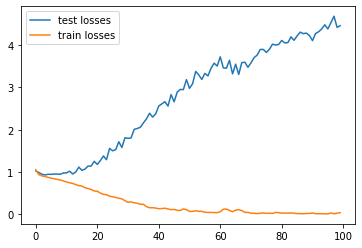

100%|██████████| 1279/1279 [00:00<00:00, 3517.88it/s]


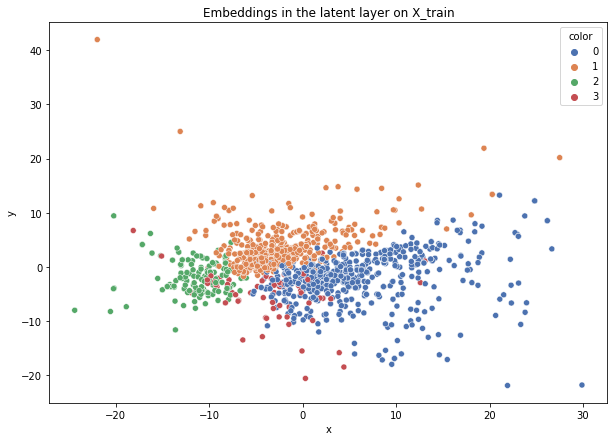

Softmax-f1: 0.414
Softmax-gmean: 0.295


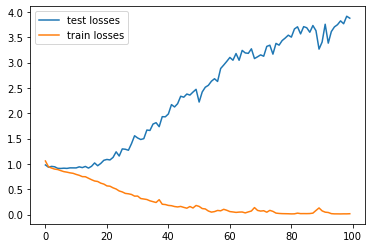

100%|██████████| 1280/1280 [00:00<00:00, 3392.36it/s]


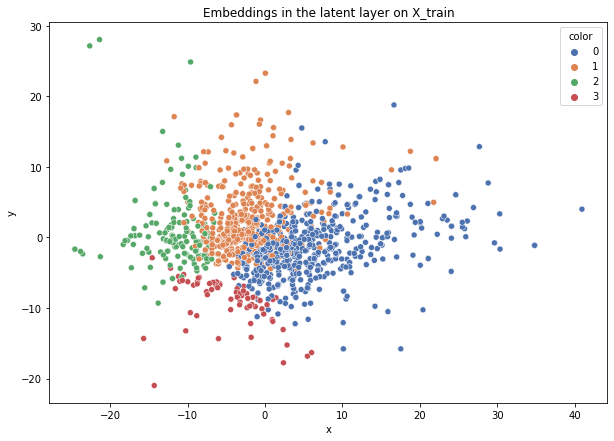

Softmax-f1: 0.576
Softmax-gmean: 0.519
thyroid-newthyroid


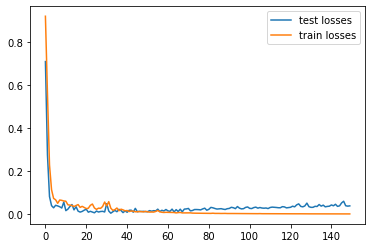

100%|██████████| 172/172 [00:00<00:00, 3437.87it/s]


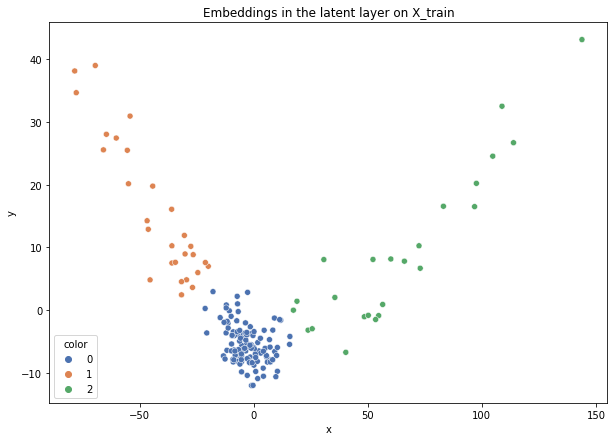

Softmax-f1: 0.964
Softmax-gmean: 0.941


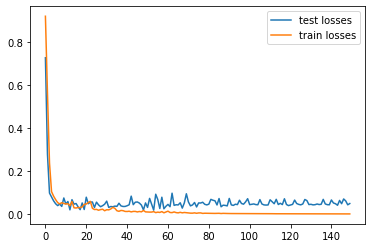

100%|██████████| 172/172 [00:00<00:00, 3448.55it/s]


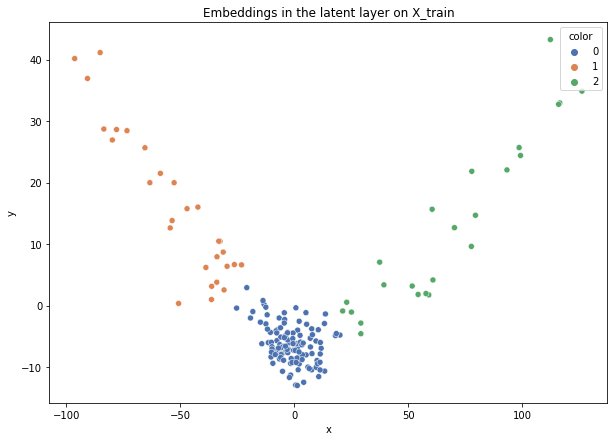

Softmax-f1: 0.969
Softmax-gmean: 0.95


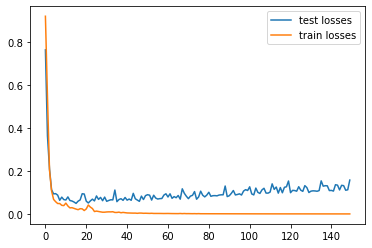

100%|██████████| 172/172 [00:00<00:00, 3345.07it/s]


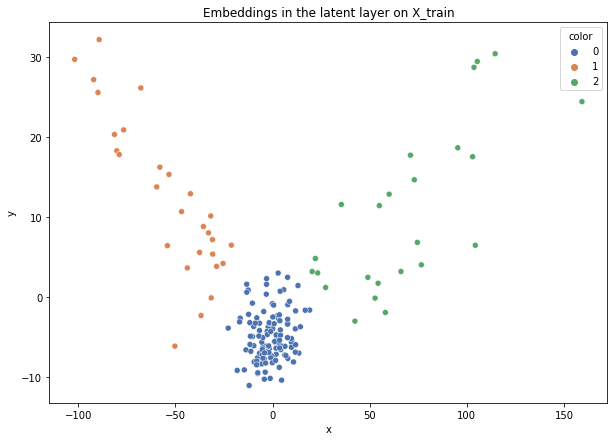

Softmax-f1: 0.941
Softmax-gmean: 0.977


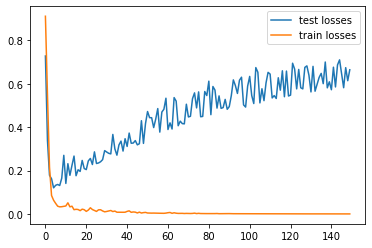

100%|██████████| 172/172 [00:00<00:00, 3371.20it/s]


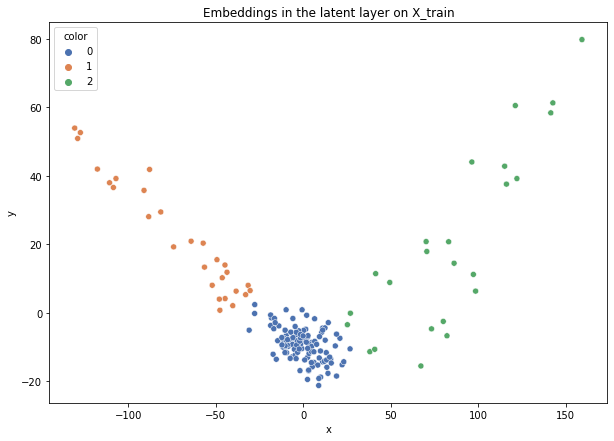

Softmax-f1: 0.882
Softmax-gmean: 0.917


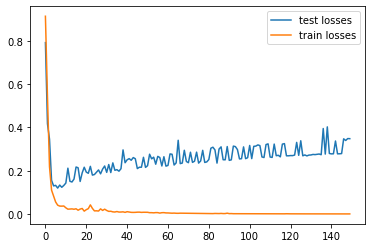

100%|██████████| 172/172 [00:00<00:00, 3321.12it/s]


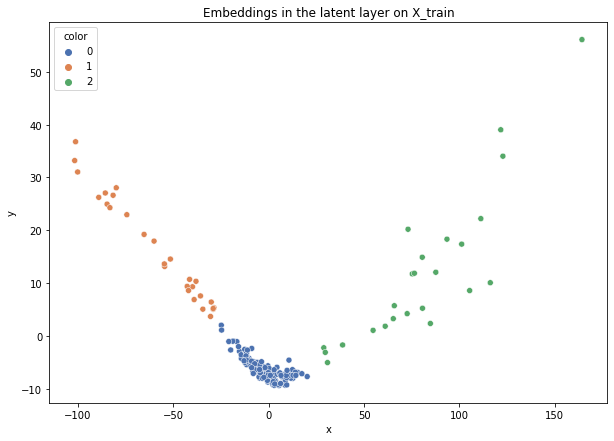

Softmax-f1: 0.923
Softmax-gmean: 0.874


In [12]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)
    
    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)

        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)

        
        cfg = config[dataset_name]
        
        model = ex.train_classification(X_train_enc, y_train, X_test_enc, y_test, cfg)
        
        # Visualize embeddings
        dataset1 = TensorDataset(torch.Tensor(X_train_enc), torch.Tensor(y_train))
        test_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=1)
        
        embeddings, labels = calc_embeddings(model, device, test_loader1)
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings), y_train)
        plt.title("Embeddings in the latent layer on X_train")
        plt.show() 
        
        dataset2 = TensorDataset(torch.Tensor(X_test_enc), torch.Tensor(y_test))
        test_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=1)
        
        preds = []
        model.eval()
        embeddings_test = []
        with torch.no_grad():
            for data, target in test_loader2:
                data, target = data.to(device), target.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                preds.append(pred.item())
                embeddings_test.append(model.embed(data).cpu().numpy()[0])
#                 print(f"Pred: {pred.item()}, target: {target.item()}, output: {output}")

        
        s_dict = calc_safety5(np.array(embeddings_test), y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)
    
    
        clf_name = "Softmax"
        gmean = gmean_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')
        fold_result_dict[f"{clf_name}-f1"].append(f1)
        fold_result_dict[f"{clf_name}-gmean"].append(gmean)
            
        
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [13]:
results_df = pd.DataFrame.from_dict(result_dict)

In [14]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [15]:
results_df

dataset  Softmax-f1  Softmax-gmean
0                      cmc    0.520116       0.498607
1              dermatology    0.948303       0.947354
2               hayes-roth    0.869134       0.861338
3              new_vehicle    0.980720       0.980794
4                new_yeast    0.539041       0.285980
5              1czysty-cut    0.977272       0.977355
6           2delikatne-cut    0.789843       0.761573
7             3mocniej-cut    0.622322       0.510434
8   4delikatne-bezover-cut    0.843685       0.841542
9            balance-scale    0.949459       0.956735
10               cleveland    0.311070       0.088827
11            cleveland_v2    0.327772       0.069011
12                   glass    0.675520       0.496992
13               new_ecoli    0.820047       0.795813
14           new_led7digit    0.762466       0.748387
15     new_winequality-red    0.500186       0.371411
16      thyroid-newthyroid    0.935625       0.931786

In [16]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [17]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [18]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [19]:
results_df.filter(regex=("dataset|Softmax-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [20]:
results_df.filter(regex=("dataset|Softmax-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)